Coisas pra fazer em ordem de importância:
1.   fazer emsembles

Coisas que podemos fazer se der tempo e tiver paciência:
1.   exploratory data analysis robusto
2. usar metodos de anomaly detection

#Importing libraries and analysis

In [1]:
# Importing libraries
import warnings
warnings.filterwarnings('ignore')

#basic libraries
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install scikit-plot
import scikitplot as skplt
import plotly.express as px

#dataset splitting
from sklearn.model_selection import train_test_split

#decompositions
!pip install umap-learn
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#modelos
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import IsolationForest
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
import tensorflow as tf

#hyperparamter tuning
!pip install parameter-sherpa
import sherpa
import sherpa.algorithms.bayesian_optimization as bayesian_optimization

#metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from keras.callbacks import Callback

#cross_validation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold, cross_validate

#emsembles
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

#balancing
!pip install imbalanced-learn
!pip install imblearn
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from collections import Counter

#feature_selection
from sklearn.feature_selection import VarianceThreshold

%matplotlib inline

0.8.1


In [2]:
bank_data = pd.read_csv('data.csv')
bank_data.head()

Bankrupt?  ...   Equity to Liability
0          1  ...              0.016469
1          1  ...              0.020794
2          1  ...              0.016474
3          1  ...              0.023982
4          1  ...              0.035490

[5 rows x 96 columns]

In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
bank_data.describe()

Bankrupt?  ...   Equity to Liability
count  6819.000000  ...           6819.000000
mean      0.032263  ...              0.047578
std       0.176710  ...              0.050014
min       0.000000  ...              0.000000
25%       0.000000  ...              0.024477
50%       0.000000  ...              0.033798
75%       0.000000  ...              0.052838
max       1.000000  ...              1.000000

[8 rows x 96 columns]

In [5]:
# Checking for duplicates
bank_data.duplicated().sum()

0

In [6]:
print(bank_data['Bankrupt?'].value_counts())

0    6599
1     220
Name: Bankrupt?, dtype: int64


In [7]:
#matriz de correlação (é bem grande, recomendo n rodar)
#fig, ax = plt.subplots(figsize=(75,75))

#sns.heatmap(bank_data.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)

#Separação treino/teste

In [8]:
x = bank_data.drop('Bankrupt?', axis=1)
y = bank_data['Bankrupt?']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [10]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [11]:
x_validation, x_test2, y_validation, y_test2 = train_test_split(x_test2, y_test2, test_size = 0.5, random_state = 0)

#PCA 2d

In [ ]:
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)

In [ ]:
# array to dataframe
x_pca = pd.DataFrame(data=x_pca[0:,0:], index=[i for i in range(x_pca.shape[0])], columns=['PC'+str(i) for i in range(x_pca.shape[1])])

In [ ]:
# insert Bankrupt colunm back to x
x_pca[' Bankrupt?'] = y

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


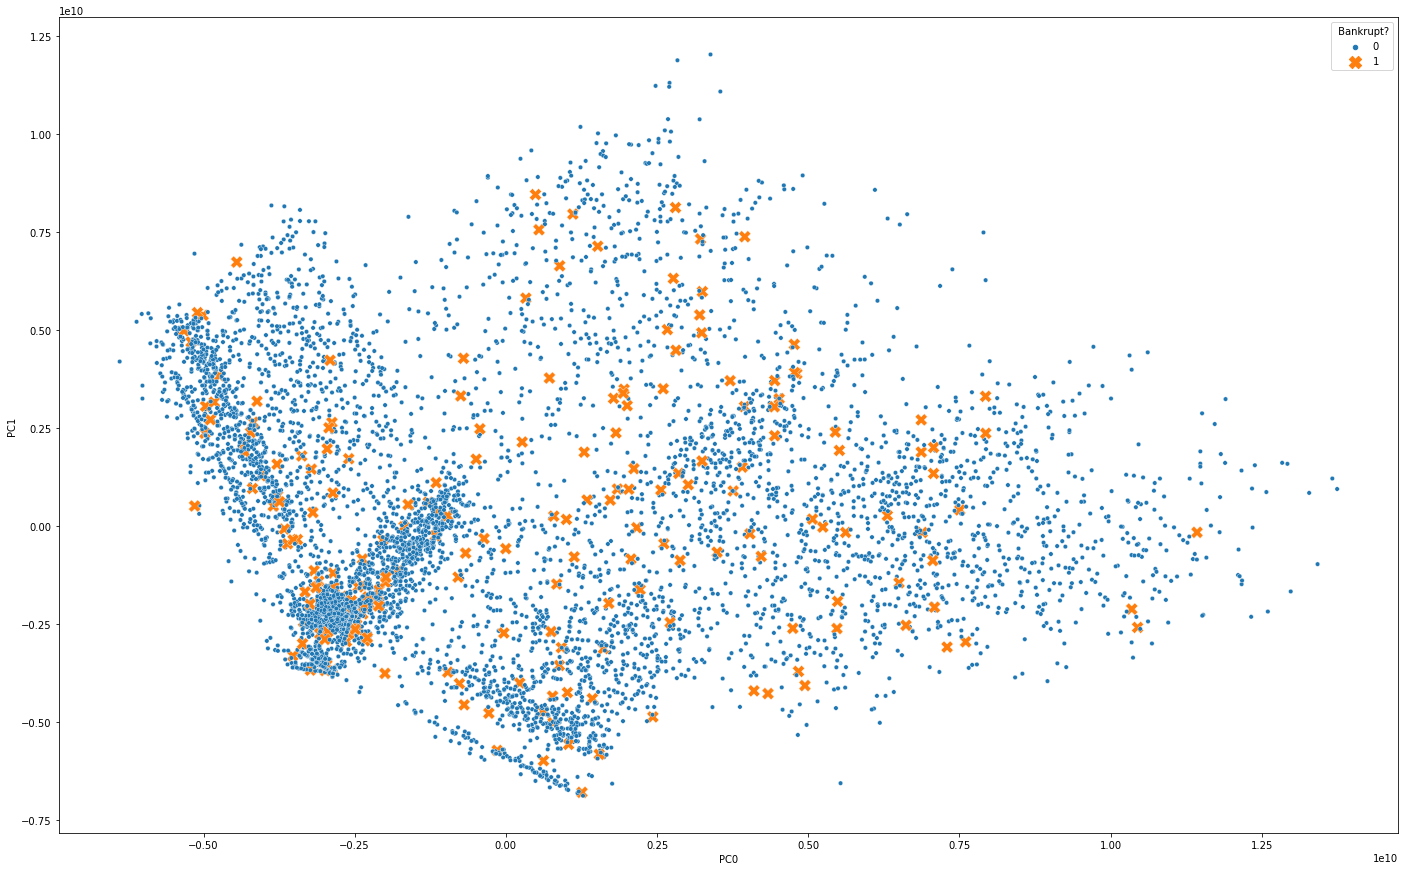

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 15)
sns.scatterplot(x_pca['PC0'], x_pca['PC1'], hue = ' Bankrupt?', style = ' Bankrupt?', data = x_pca, size=" Bankrupt?", sizes=(150, 20))

#PCA 3d

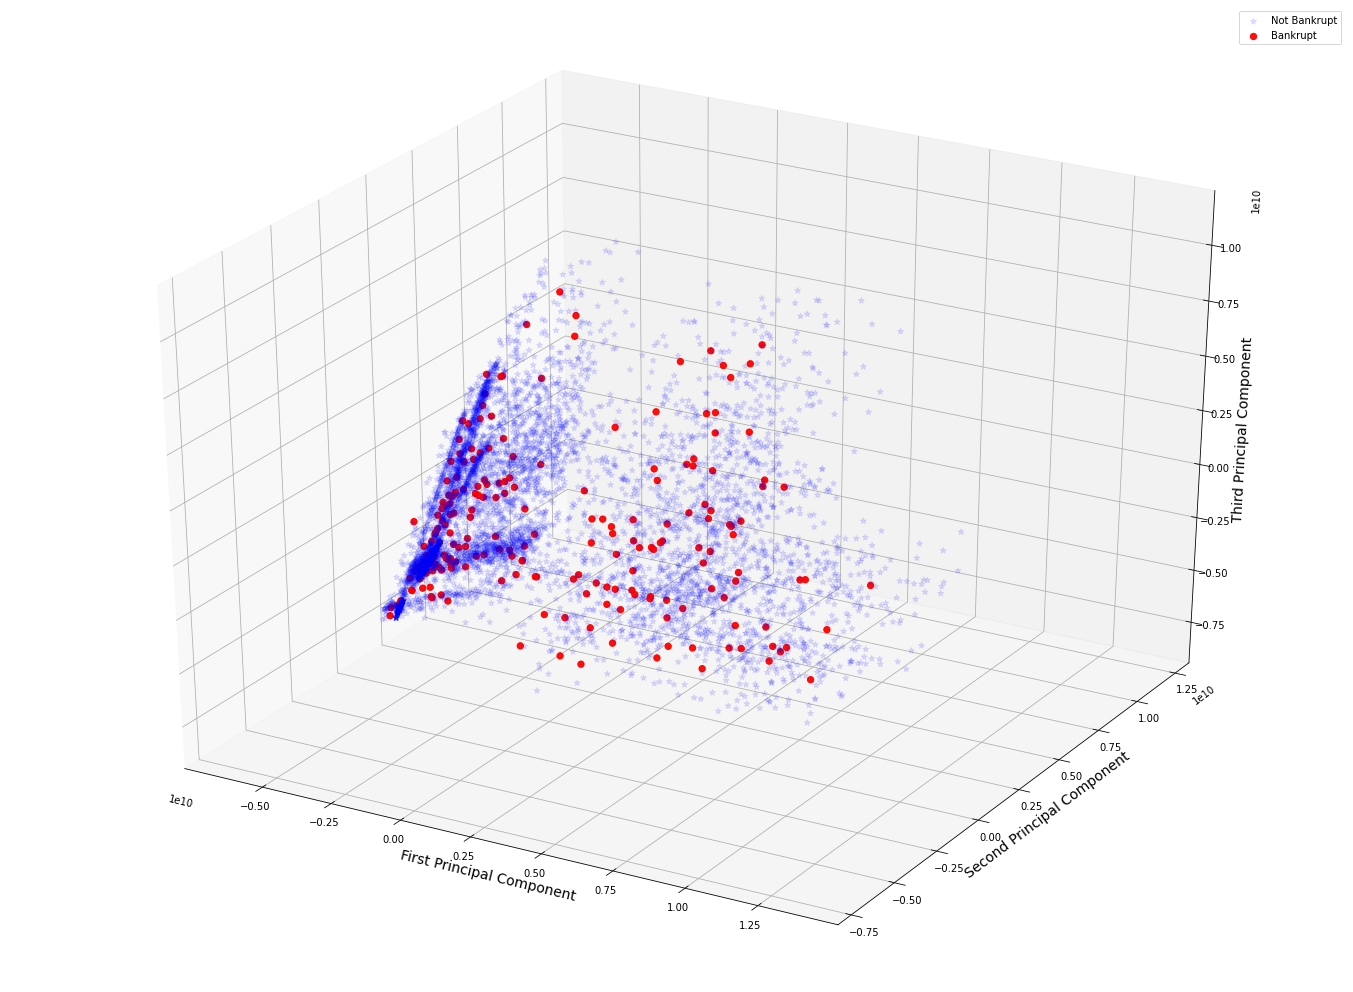

In [ ]:
pca = PCA(n_components=3)
pca.fit(x) 
x_pca = pca.transform(x) 

ex_variance=np.var(x_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = x_pca[:,0]
Yax = x_pca[:,1]
Zax = x_pca[:,2]

cdict = {0:'blue',1:'red'}
labl = {0:'Not Bankrupt',1:'Bankrupt'}
marker = {0:'*',1:'o'}
alpha = {0:.1, 1:.95}

fig = plt.figure(figsize=(24,18))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

#TSNE 2d

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
x_tsne = tsne.fit_transform(x)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6819 samples in 0.002s...
[t-SNE] Computed neighbors for 6819 samples in 1.349s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6819
[t-SNE] Computed conditional probabilities for sample 2000 / 6819
[t-SNE] Computed conditional probabilities for sample 3000 / 6819
[t-SNE] Computed conditional probabilities for sample 4000 / 6819
[t-SNE] Computed conditional probabilities for sample 5000 / 6819
[t-SNE] Computed conditional probabilities for sample 6000 / 6819
[t-SNE] Computed conditional probabilities for sample 6819 / 6819
[t-SNE] Mean sigma: 4.624504
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.117477
[t-SNE] KL divergence after 2000 iterations: 0.811514


In [ ]:
# array to dataframe
x_tsne = pd.DataFrame(data=x_tsne[0:,0:], index=[i for i in range(x_tsne.shape[0])], columns=['TSNE'+str(i) for i in range(x_tsne.shape[1])])

In [ ]:
# insert Bankrupt colunm back to x
x_tsne[' Bankrupt?'] = y

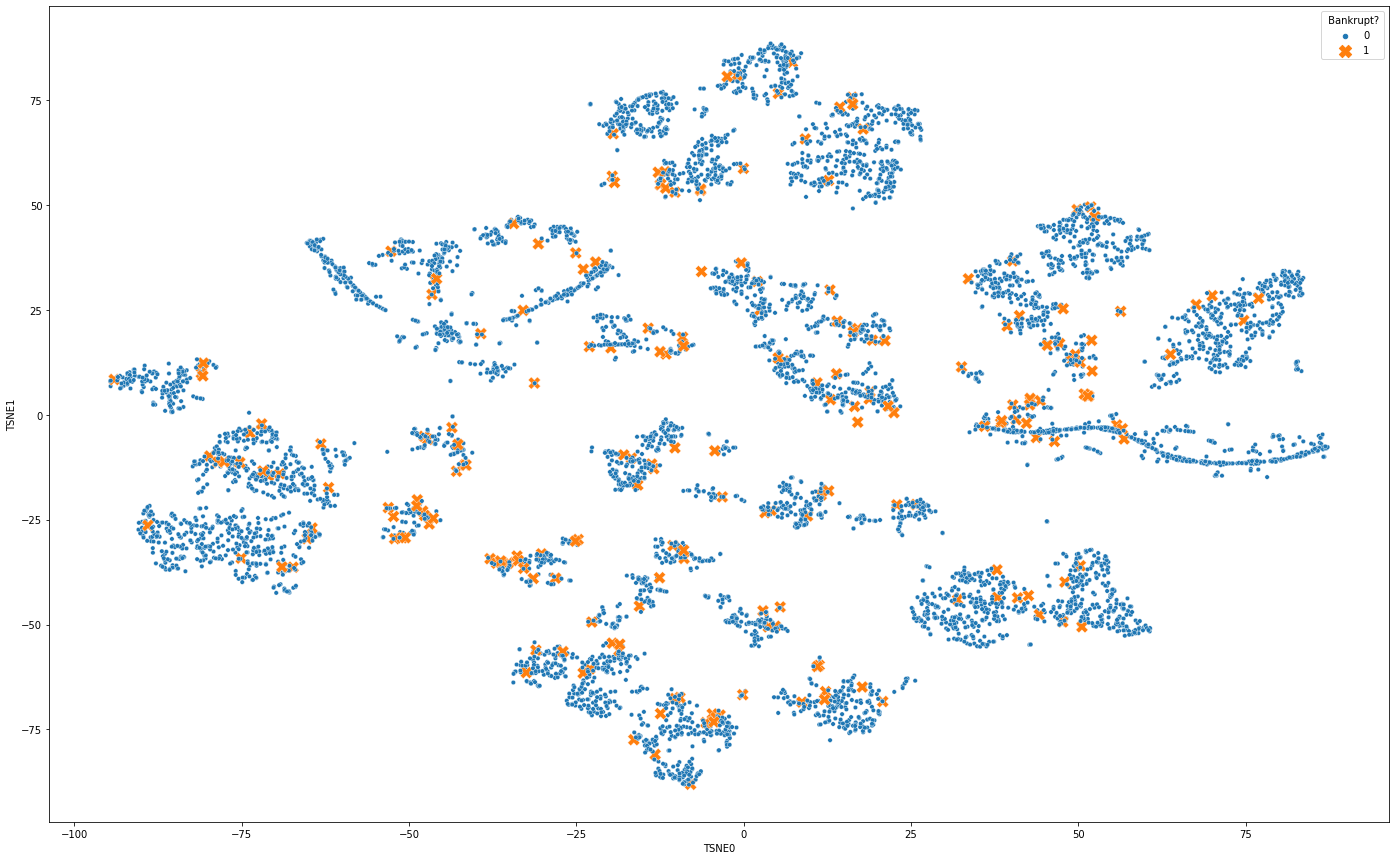

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 15)
sns.scatterplot(x_tsne['TSNE0'], x_tsne['TSNE1'], hue = ' Bankrupt?', style = ' Bankrupt?', data = x_tsne, size=" Bankrupt?", sizes=(150, 20))

#TSNE 3d

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6819 samples in 0.001s...
[t-SNE] Computed neighbors for 6819 samples in 1.232s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6819
[t-SNE] Computed conditional probabilities for sample 2000 / 6819
[t-SNE] Computed conditional probabilities for sample 3000 / 6819
[t-SNE] Computed conditional probabilities for sample 4000 / 6819
[t-SNE] Computed conditional probabilities for sample 5000 / 6819
[t-SNE] Computed conditional probabilities for sample 6000 / 6819
[t-SNE] Computed conditional probabilities for sample 6819 / 6819
[t-SNE] Mean sigma: 4.624504
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.626663
[t-SNE] KL divergence after 2000 iterations: 0.696910


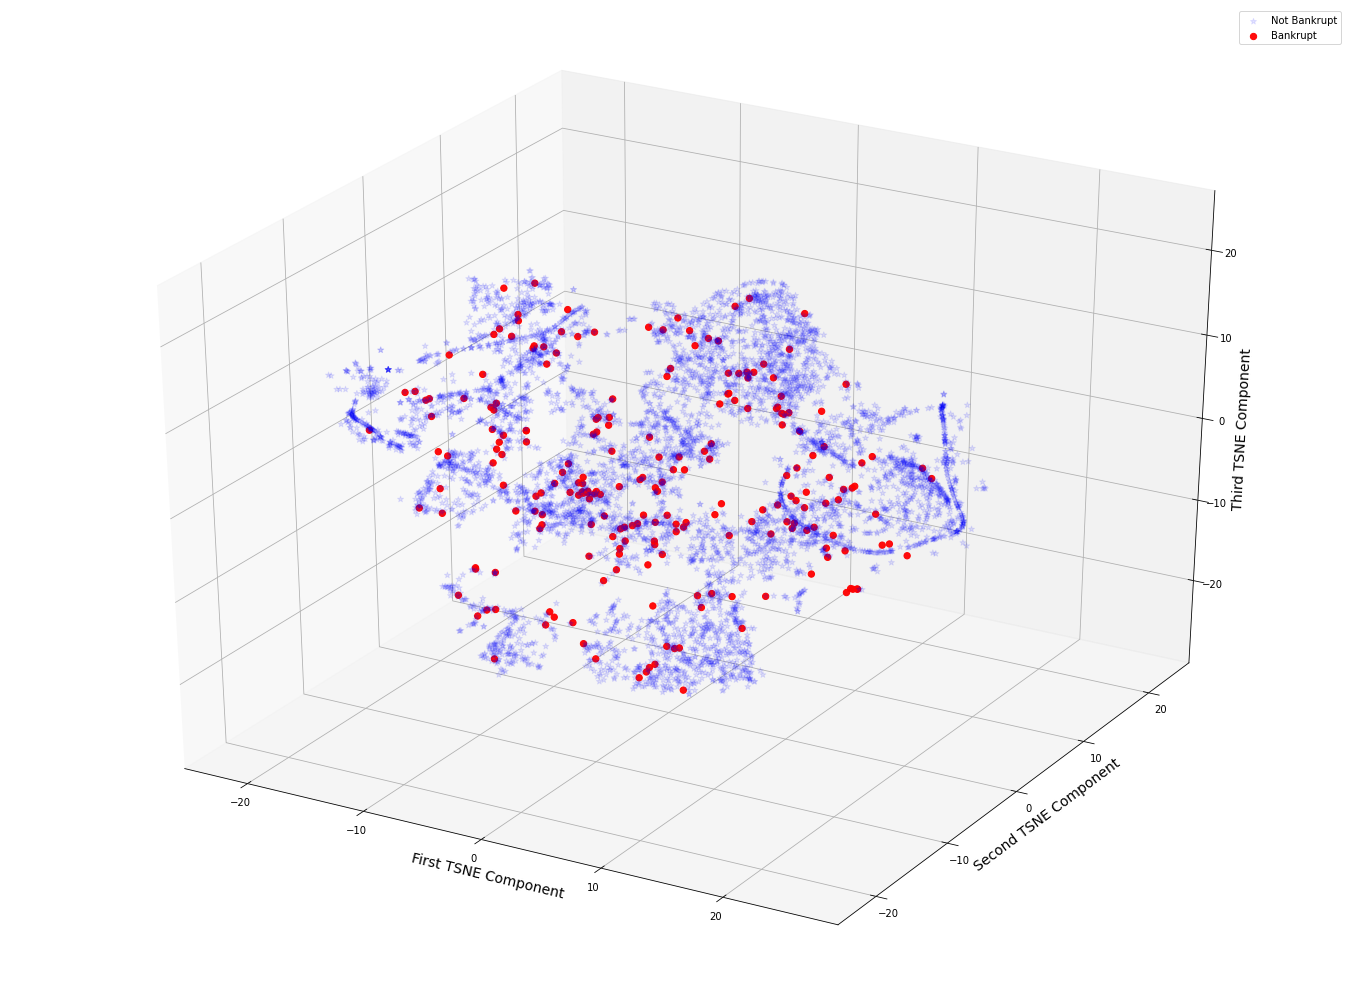

In [ ]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=2000)
x_tsne = tsne.fit_transform(x)

ex_variance=np.var(x_tsne,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = x_tsne[:,0]
Yax = x_tsne[:,1]
Zax = x_tsne[:,2]

cdict = {0:'blue',1:'red'}
labl = {0:'Not Bankrupt',1:'Bankrupt'}
marker = {0:'*',1:'o'}
alpha = {0:.1, 1:.95}

fig = plt.figure(figsize=(24,18))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First TSNE Component", fontsize=14)
ax.set_ylabel("Second TSNE Component", fontsize=14)
ax.set_zlabel("Third TSNE Component", fontsize=14)

ax.legend()
plt.show()

#UMAP 2d

In [ ]:
manifold = umap.UMAP().fit(x, y)
x_umap = manifold.transform(x)

In [ ]:
# array to dataframe
x_umap = pd.DataFrame(data=x_umap[0:,0:], index=[i for i in range(x_umap.shape[0])], columns=['UMAP'+str(i) for i in range(x_umap.shape[1])])

In [ ]:
# insert Bankrupt colunm back to x
x_umap[' Bankrupt?'] = y

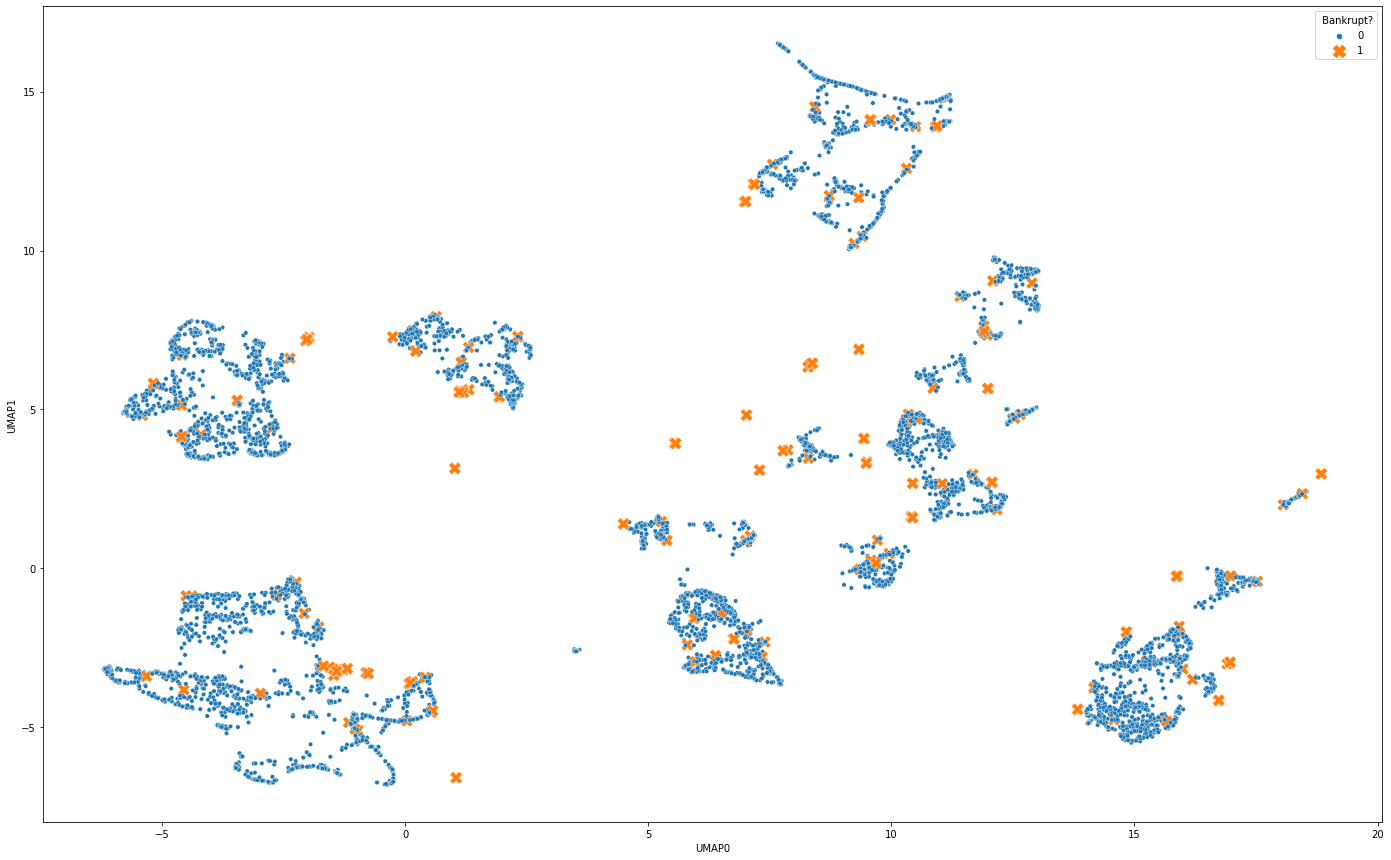

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 15)
sns.scatterplot(x_umap['UMAP0'], x_umap['UMAP1'], hue = ' Bankrupt?', style = ' Bankrupt?', data = x_umap, size=" Bankrupt?", sizes=(150, 20))

#UMAP 3d

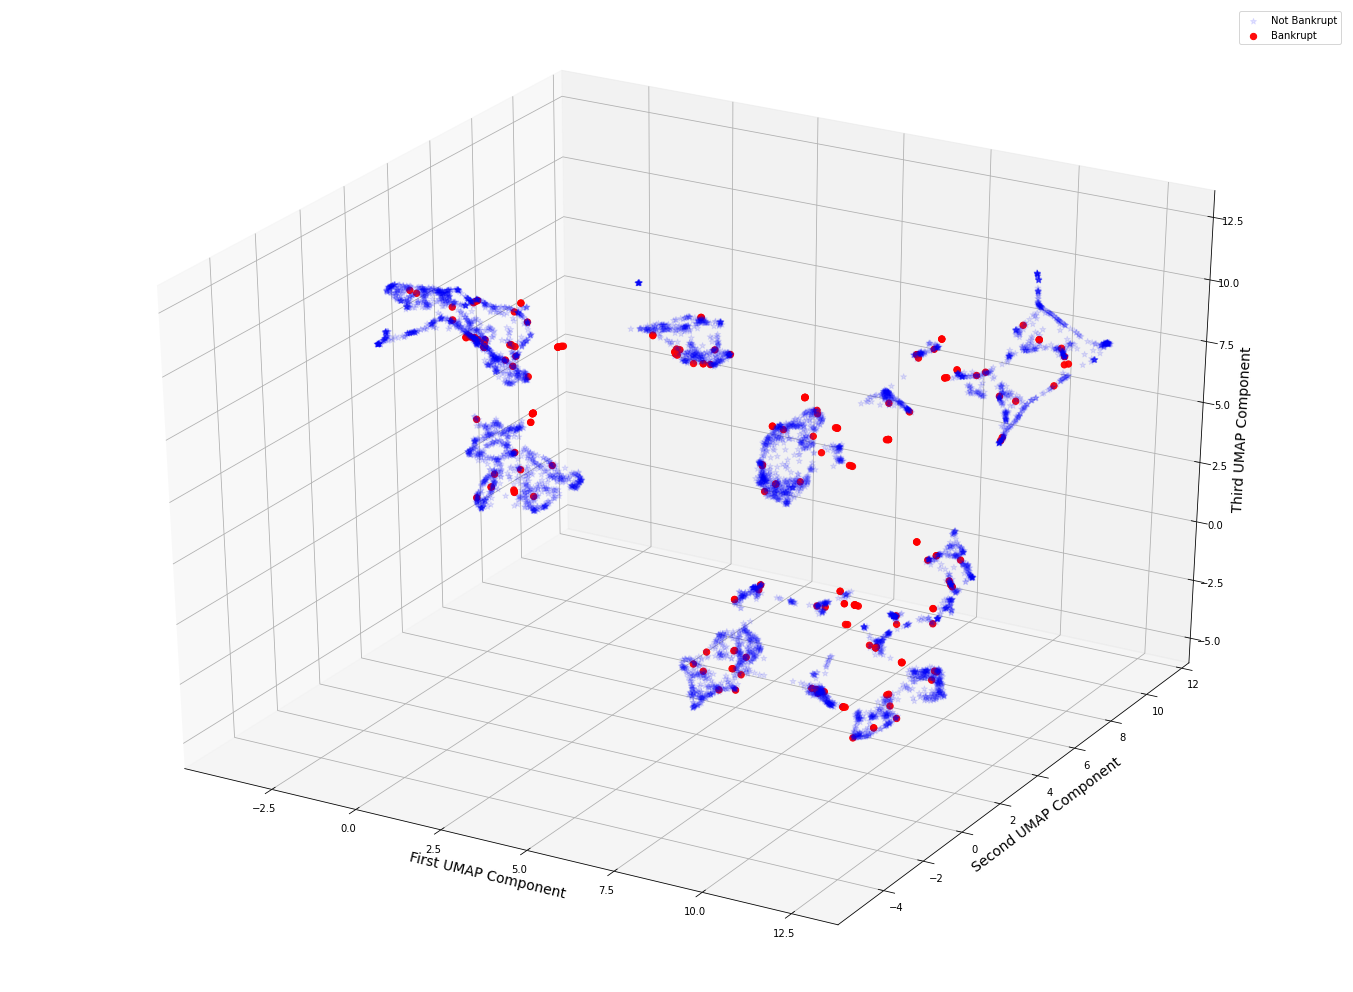

In [ ]:
manifold = umap.UMAP(n_components=3).fit(x, y)
x_umap_simpled = manifold.transform(x)

ex_variance=np.var(x_umap_simpled,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = x_umap_simpled[:,0]
Yax = x_umap_simpled[:,1]
Zax = x_umap_simpled[:,2]

cdict = {0:'blue',1:'red'}
labl = {0:'Not Bankrupt',1:'Bankrupt'}
marker = {0:'*',1:'o'}
alpha = {0:.1, 1:.95}

fig = plt.figure(figsize=(24,18))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First UMAP Component", fontsize=14)
ax.set_ylabel("Second UMAP Component", fontsize=14)
ax.set_zlabel("Third UMAP Component", fontsize=14)

ax.legend()
plt.show()

In [ ]:
x_train_umaped, x_test_umaped, y_train_umaped, y_test_umaped = train_test_split(x_umap_simpled, y, test_size = 0.2, random_state = 0)

#**Para todos (PCA, TSNE e UMAP) utilizar x (x = transform(x)) resulta em scores mais baixos em todos os modelos**

#LogisticRegression

In [ ]:
lr = LogisticRegression(random_state=0, max_iter = 100000)

lr.fit(x_train,y_train)
lr_pred_class = lr.predict(x_test)

print(classification_report(y_test, lr_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.95      1364
   macro avg       0.48      0.49      0.49      1364
weighted avg       0.93      0.95      0.94      1364



Text(0, 0.5, 'True Positive Rate')

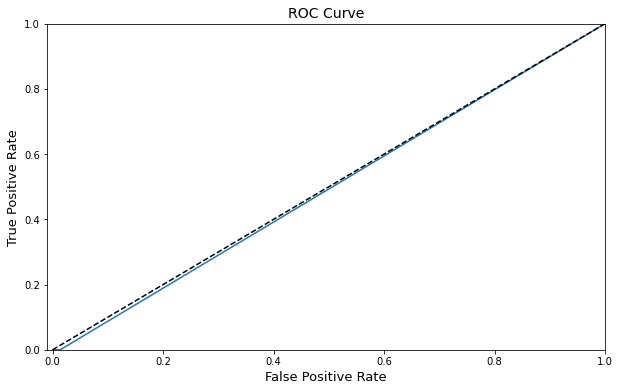

In [ ]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, lr_pred_class)

plt.figure(figsize=(10,6))
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, lr_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

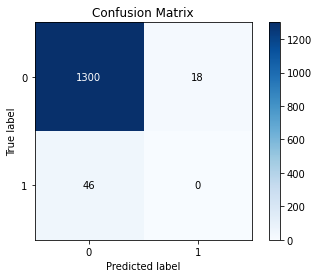

In [ ]:
plot = skplt.metrics.plot_confusion_matrix(y_test, lr_pred_class)

#LinearDiscriminantAnalysis

In [ ]:
ld = LinearDiscriminantAnalysis()

ld.fit(x_train,y_train)
ld_pred_class = ld.predict(x_test)

print(classification_report(y_test, ld_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1318
           1       0.53      0.35      0.42        46

    accuracy                           0.97      1364
   macro avg       0.76      0.67      0.70      1364
weighted avg       0.96      0.97      0.96      1364



Text(0, 0.5, 'True Positive Rate')

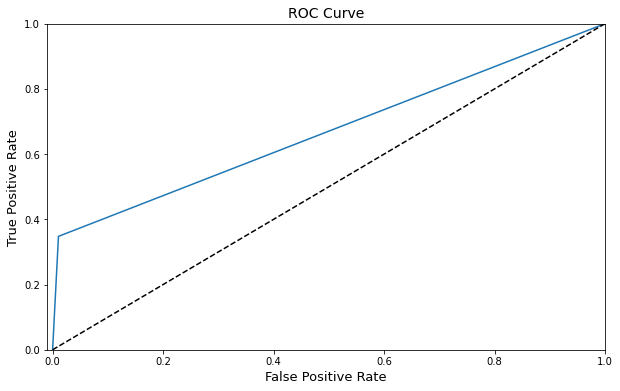

In [ ]:
ld_fpr, ld_tpr, ld_thresold = roc_curve(y_test, ld_pred_class)

plt.figure(figsize=(10,6))
plt.plot(ld_fpr, ld_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ld_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

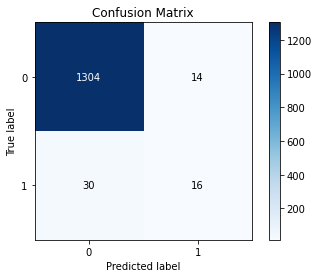

In [ ]:
plot = skplt.metrics.plot_confusion_matrix(y_test, ld_pred_class)

#XGBoost

In [ ]:
xgb = XGBClassifier()

xgb.fit(x_train,y_train)
xgb_pred_class = xgb.predict(x_test)

print(classification_report(y_test, xgb_pred_class))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1318
           1       0.72      0.28      0.41        46

    accuracy                           0.97      1364
   macro avg       0.85      0.64      0.70      1364
weighted avg       0.97      0.97      0.97      1364



Text(0, 0.5, 'True Positive Rate')

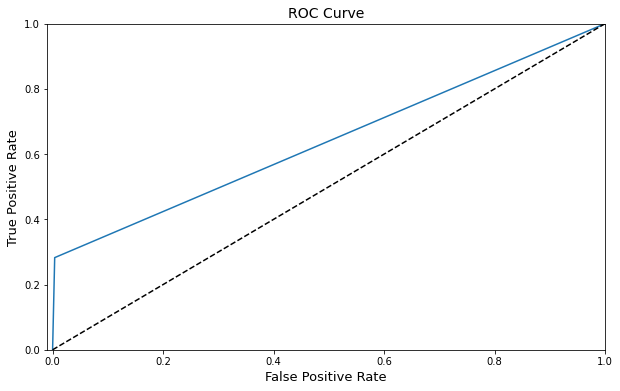

In [ ]:
xgb_fpr, xgb_tpr, xgb_thresold = roc_curve(y_test, xgb_pred_class)

plt.figure(figsize=(10,6))
plt.plot(xgb_fpr, xgb_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, xgb_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

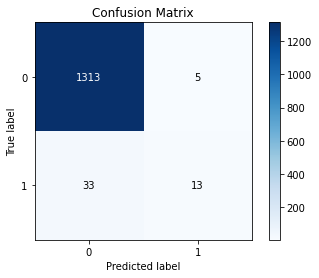

In [ ]:
plot = skplt.metrics.plot_confusion_matrix(y_test, xgb_pred_class)

#SVM

In [ ]:
svc = SVC(kernel = 'rbf')

svc.fit(x_train,y_train)
svc_pred_class = svc.predict(x_test)

print(classification_report(y_test, svc_pred_class))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.97      0.95      1364



Text(0, 0.5, 'True Positive Rate')

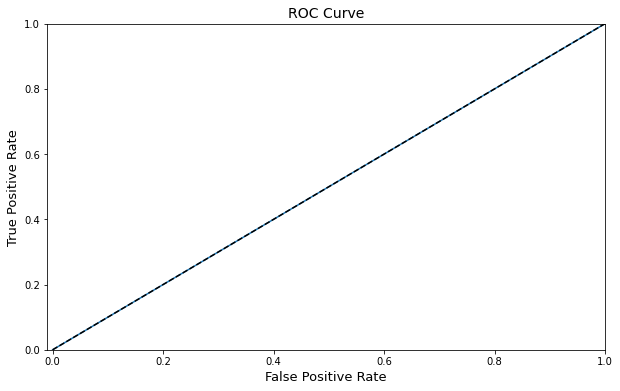

In [ ]:
svc_fpr, svc_tpr, svc_thresold = roc_curve(y_test, svc_pred_class)

plt.figure(figsize=(10,6))
plt.plot(svc_fpr, svc_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

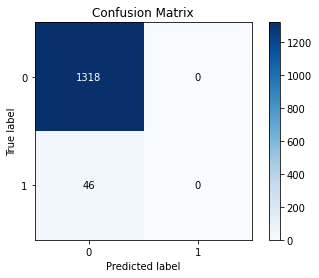

In [ ]:
plot = skplt.metrics.plot_confusion_matrix(y_test, svc_pred_class)

#Random Forest

In [ ]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train)
rf_pred_class = rf.predict(x_test)

print(classification_report(y_test, rf_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.61      0.24      0.34        46

    accuracy                           0.97      1364
   macro avg       0.79      0.62      0.66      1364
weighted avg       0.96      0.97      0.96      1364



Text(0, 0.5, 'True Positive Rate')

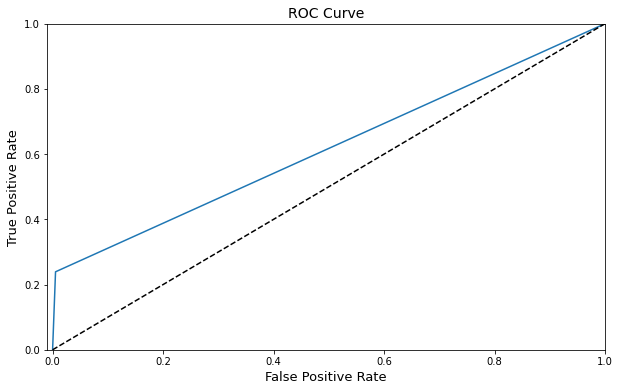

In [ ]:
rf_fpr, rf_tpr, rf_thresold = roc_curve(y_test, rf_pred_class)

plt.figure(figsize=(10,6))
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rf_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

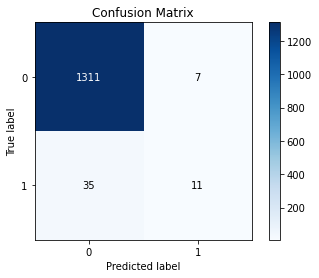

In [ ]:
plot = skplt.metrics.plot_confusion_matrix(y_test, rf_pred_class)

#KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(x_train, y_train)
knn_pred_class = knn.predict(x_test)

print(classification_report(y_test, knn_pred_class))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.97      0.95      1364



Text(0, 0.5, 'True Positive Rate')

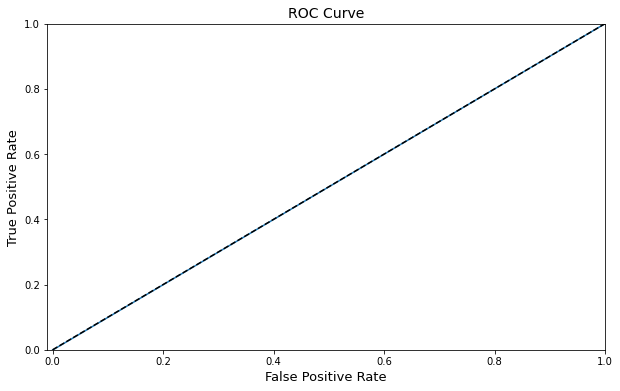

In [ ]:
knn_fpr, knn_tpr, knn_thresold = roc_curve(y_test, knn_pred_class)

plt.figure(figsize=(10,6))
plt.plot(knn_fpr, knn_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knn_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

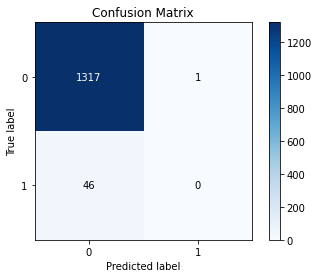

In [ ]:
plot = skplt.metrics.plot_confusion_matrix(y_test, knn_pred_class)

# Isolation Forest

In [ ]:
bank_data_copy = bank_data

In [ ]:
iforest = IsolationForest(n_estimators=500, max_features=20, contamination = 0.032)

pred= iforest.fit_predict(x)
bank_data_copy['scores']=iforest.decision_function(x)
bank_data_copy['anomaly_label']=pred

In [ ]:
bank_data_copy['anomaly']=bank_data_copy['anomaly_label'].apply(lambda x: 'outlier' if x==-1  else 'inlier')
fig=px.histogram(bank_data_copy,x='scores',color='anomaly')
fig.show()

In [ ]:
idx = np.where((bank_data_copy.anomaly_label==-1) & (bank_data_copy['Bankrupt?'] == 0))
print(len(bank_data_copy.loc[idx]))

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


185


In [ ]:
idx = np.where((bank_data_copy.anomaly_label==-1) & (bank_data_copy['Bankrupt?'] == 1))
print(len(bank_data_copy.loc[idx]))

34


#Neural Network

In [ ]:
mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)

mlp.fit(x_train, y_train)
mlp_pred_class = mlp.predict(x_test)

print(classification_report(y_test, mlp_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.94      1364
   macro avg       0.48      0.49      0.48      1364
weighted avg       0.93      0.94      0.94      1364



Text(0, 0.5, 'True Positive Rate')

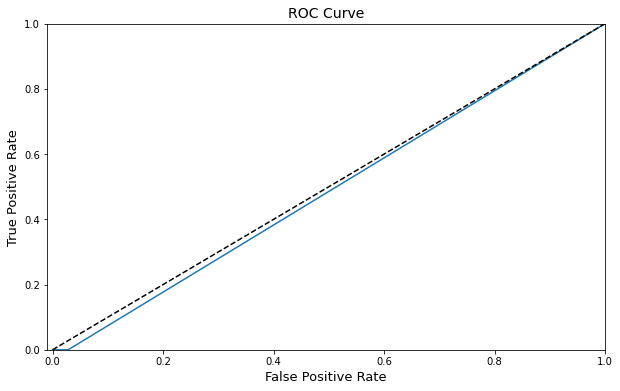

In [ ]:
mlp_fpr, mlp_tpr, mlp_thresold = roc_curve(y_test, mlp_pred_class)

plt.figure(figsize=(10,6))
plt.plot(mlp_fpr, mlp_tpr, label='MLP Classifier Score: {:.4f}'.format(roc_auc_score(y_test, mlp_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

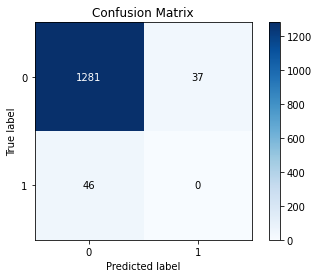

In [ ]:
plot = skplt.metrics.plot_confusion_matrix(y_test, mlp_pred_class)

# AutoEncoder

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

In [ ]:
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# create a model by subclassing Model class in tensorflow
class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units
  
  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
model = AutoEncoder(output_units=x_train.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    x_train,
    x_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_train, x_train)
)

Epoch 1/20
11/11 [==============================] - 2s 61ms/step - loss: 17.9459 - mse: 1348233939801604096.0000 - val_loss: 17.9209 - val_mse: 1348233939801604096.0000
Epoch 2/20
11/11 [==============================] - 0s 13ms/step - loss: 17.9167 - mse: 1348233802362650624.0000 - val_loss: 17.8835 - val_mse: 1348233939801604096.0000
Epoch 3/20
11/11 [==============================] - 0s 14ms/step - loss: 17.8371 - mse: 1348233939801604096.0000 - val_loss: 17.7689 - val_mse: 1348233939801604096.0000
Epoch 4/20
11/11 [==============================] - 0s 17ms/step - loss: 17.7363 - mse: 1348233802362650624.0000 - val_loss: 17.6894 - val_mse: 1348233939801604096.0000
Epoch 5/20
11/11 [==============================] - 0s 16ms/step - loss: 17.6710 - mse: 1348233939801604096.0000 - val_loss: 17.6573 - val_mse: 1348233939801604096.0000
Epoch 6/20
11/11 [==============================] - 0s 14ms/step - loss: 17.6343 - mse: 1348233802362650624.0000 - val_loss: 17.6098 - val_mse: 13482339398

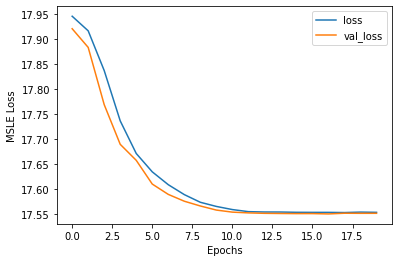

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)

  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def find_threshold_method_two(model, x_train_scaled):
  # another method to find threshold
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)

  threshold_2 = np.percentile(reconstruction_errors, 95)
  return threshold_2

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds

In [ ]:
threshold = find_threshold(model, x_train)
print(f"Threshold method one: {threshold}")

threshold_2 = find_threshold_method_two(model, x_train)
print(f"Threshold method two: {threshold_2}")

Threshold method one: 24.686846547965096
Threshold method two: 29.28132677405692


In [ ]:
preds = get_predictions(model, x_train, threshold)
accuracy_score(preds, y_test)

ValueError: ignored

# Logistic Regression tuning with sherpa

In [ ]:
# Mais correto comentado porque a implementacao seria mais chatinha
# parameters_log_reg = [sherpa.Continuous('C', [1, 0.0001]),
#                       sherpa.Choice('penalty', ['l1', 'l2', 'elasticnet', 'none']),
#                       sherpa.Choice('solver', ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'])]

parameters_log_reg = [sherpa.Continuous('C', [1, 0.0001]),
                      sherpa.Choice('penalty', ['l2', 'none'])]

algorithm_log_reg = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [ ]:
study_log_reg = sherpa.Study(parameters=parameters_log_reg,
                             algorithm=algorithm_log_reg,
                             lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8880 if on a cluster or
http://localhost:8880 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [ ]:
for trial in study_log_reg:
  print("Trial ", trial.id, " with parameters ", trial.parameters)
  log_reg = LogisticRegression(penalty=trial.parameters['penalty'],
                               C=trial.parameters['C'])
  log_reg.fit(x_train2, y_train2)
  log_reg_pred = log_reg.predict(x_test2)
  log_reg_f1 = f1_score(y_test2, log_reg_pred)
  print("F1 Score: ", log_reg_f1)

  study_log_reg.add_observation(trial, log_reg_f1)
  study_log_reg.finalize(trial)
print(study_log_reg.get_best_result())

Trial  1  with parameters  {'C': 0.04146768857477845, 'penalty': 'l2'}
F1 Score:  0.0
Trial  2  with parameters  {'C': 0.8245873913347694, 'penalty': 'l2'}
F1 Score:  0.0
Trial  3  with parameters  {'C': 0.18023588140404845, 'penalty': 'l2'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 Score:  0.0
Trial  4  with parameters  {'C': 1.0, 'penalty': 'none'}
F1 Score:  0.0


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  5  with parameters  {'C': 1.0, 'penalty': 'none'}
F1 Score:  0.0


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  6  with parameters  {'C': 1.0, 'penalty': 'none'}
F1 Score:  0.0


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  7  with parameters  {'C': 1.0, 'penalty': 'none'}
F1 Score:  0.0


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  8  with parameters  {'C': 1.0, 'penalty': 'none'}
F1 Score:  0.0


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  9  with parameters  {'C': 1.0, 'penalty': 'none'}
F1 Score:  0.0


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  10  with parameters  {'C': 1.0, 'penalty': 'none'}
F1 Score:  0.0
{'Trial-ID': 1, 'Iteration': 1, 'C': 0.04146768857477845, 'penalty': 'l2', 'Objective': 0.0}


#Linear Discriminant Analysis tuning with sherpa

In [ ]:
# Mais correto comentado porque a implementacao seria mais chatinha
# parameters_lda = [sherpa.Choice('solver', ['svd', 'lsqr', 'eigen']),
#                   sherpa.Choice('shrinkage', ['auto', 'none', 'float']),
#                   sherpa.Continuous('shrinkage_value', [0, 1]),
#                   sherpa.Discrete('n_components', [0, bank_data.shape()[1]])]

parameters_lda = [sherpa.Choice('solver', ['svd', 'lsqr'])]

algorithm_lda = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [ ]:
study_lda = sherpa.Study(parameters=parameters_lda,
                             algorithm=algorithm_lda,
                             lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8881 if on a cluster or
http://localhost:8881 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [ ]:
for trial in study_lda:
  print("Trial ", trial.id, " with parameters ", trial.parameters)
  lda = LinearDiscriminantAnalysis(solver=trial.parameters['solver'])
  lda.fit(x_train2, y_train2)
  lda_pred = lda.predict(x_test2)
  lda_f1 = f1_score(y_test2, lda_pred)
  print("F1 Score: ", lda_f1)

  study_lda.add_observation(trial, lda_f1)
  study_lda.finalize(trial)
print(study_lda.get_best_result())

Trial  1  with parameters  {'solver': 'svd'}
F1 Score:  0.24242424242424246
Trial  2  with parameters  {'solver': 'lsqr'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 Score:  0.0


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  3  with parameters  {'solver': 'svd'}
F1 Score:  0.24242424242424246


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  4  with parameters  {'solver': 'svd'}
F1 Score:  0.24242424242424246


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  5  with parameters  {'solver': 'svd'}
F1 Score:  0.24242424242424246


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  6  with parameters  {'solver': 'lsqr'}
F1 Score:  0.0


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  7  with parameters  {'solver': 'svd'}
F1 Score:  0.24242424242424246


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  8  with parameters  {'solver': 'svd'}
F1 Score:  0.24242424242424246


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  9  with parameters  {'solver': 'svd'}
F1 Score:  0.24242424242424246


Trial  10  with parameters  {'solver': 'lsqr'}
F1 Score:  0.0
{'Trial-ID': 1, 'Iteration': 1, 'solver': 'svd', 'Objective': 0.24242424242424246}


#XGBoost tuning with sherpa

In [ ]:
parameters_xgb = [sherpa.Continuous('learning_rate', [0.01, 0.1]),
              sherpa.Discrete('max_depth', [3, 10]),
              sherpa.Discrete('min_child_weight', [1, 5]),
              sherpa.Continuous('subsample', [0.5, 0.7]),
              sherpa.Continuous('colsample_bytree', [0.5, 0.7]),
              sherpa.Discrete('n_estimators', [100, 500])]

algorithm_xgb = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [ ]:
study_xgb = sherpa.Study(parameters=parameters_xgb,
                     algorithm=algorithm_xgb,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8882 if on a cluster or
http://localhost:8882 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [ ]:
for trial in study_xgb:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    xgb = XGBClassifier(learning_rate=trial.parameters['learning_rate'],
                                 max_depth=int(trial.parameters['max_depth']),
                                 min_child_weight=int(trial.parameters['min_child_weight']),
                                 subsample=trial.parameters['subsample'],
                                 colsample_bytree=trial.parameters['colsample_bytree'],
                                 n_estimators=int(trial.parameters['n_estimators']),
                                 objective= 'reg:squarederror')
    xgb.fit(x_train2, y_train2)
    xgb_pred_class = xgb.predict(x_test2)

    xgb_f1 = f1_score(y_test2, xgb_pred_class)

    print("F1 score: ", xgb_f1)
    study_xgb.add_observation(trial, iteration=1, objective=xgb_f1)
    study_xgb.finalize(trial)
print(study_xgb.get_best_result())




Trial  1  with parameters  {'learning_rate': 0.09498117064517717, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.5530447251543342, 'colsample_bytree': 0.6233612922425695, 'n_estimators': 494}
F1 score:  0.2222222222222222
Trial  2  with parameters  {'learning_rate': 0.08938777998406208, 'max_depth': 8, 'min_child_weight': 3, 'subsample': 0.6491211940704369, 'colsample_bytree': 0.6613395360170096, 'n_estimators': 165}
F1 score:  0.24242424242424246
Trial  3  with parameters  {'learning_rate': 0.04958490674530066, 'max_depth': 6, 'min_child_weight': 4, 'subsample': 0.6918644840492563, 'colsample_bytree': 0.5596644846976111, 'n_estimators': 428}
F1 score:  0.13793103448275865
Trial  4  with parameters  {'learning_rate': 0.08718789192295125, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.5679105986846118, 'colsample_bytree': 0.5092762428294942, 'n_estimators': 163}
F1 score:  0.19354838709677416
Trial  5  with parameters  {'learning_rate': 0.08098752639386222, 'max_depth': 4,

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.19354838709677416
Trial  8  with parameters  {'learning_rate': 0.08098769114115112, 'max_depth': 4.0, 'min_child_weight': 4.0, 'subsample': 0.5534598385373612, 'colsample_bytree': 0.6431765416046346, 'n_estimators': 154.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.3225806451612903
Trial  9  with parameters  {'learning_rate': 0.08099452392842761, 'max_depth': 4.0, 'min_child_weight': 4.0, 'subsample': 0.553427113023198, 'colsample_bytree': 0.6431857647665348, 'n_estimators': 154.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.3333333333333333
Trial  10  with parameters  {'learning_rate': 0.0810691345840152, 'max_depth': 4.0, 'min_child_weight': 4.0, 'subsample': 0.5530739797750148, 'colsample_bytree': 0.6433238681777609, 'n_estimators': 154.0}
F1 score:  0.25806451612903225
{'Trial-ID': 9, 'Iteration': 1, 'colsample_bytree': 0.6431857647665348, 'learning_rate': 0.08099452392842761, 'max_depth': 4.0, 'min_child_weight': 4.0, 'n_estimators': 154.0, 'subsample': 0.553427113023198, 'Objective': 0.3333333333333333}


#SVM tuning with sherpa

In [ ]:
parameters_svc = [sherpa.Continuous('C', [0.1, 1000]),
              sherpa.Continuous('gamma', [1, 0.0001]),
              sherpa.Choice('class_weight', ['balanced', None])]

algorithm_svc = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [ ]:
study_svc = sherpa.Study(parameters=parameters_svc,
                     algorithm=algorithm_svc,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8883 if on a cluster or
http://localhost:8883 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [ ]:
for trial in study_svc:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    svc = SVC(C=trial.parameters['C'],
                                 gamma=trial.parameters['gamma'],
                                 kernel = 'rbf',
                                 class_weight=trial.parameters['class_weight'])
    svc.fit(x_train2, y_train2)
    svc_pred_class = svc.predict(x_test2)

    svc_f1 = f1_score(y_test2, svc_pred_class)

    print("F1 score: ", svc_f1)
    study_svc.add_observation(trial, iteration=1, objective=svc_f1)
    study_svc.finalize(trial)
print(study_svc.get_best_result())




Trial  1  with parameters  {'C': 905.9506806004343, 'gamma': 0.4906653969844138, 'class_weight': 'balanced'}
F1 score:  0.0
Trial  2  with parameters  {'C': 210.02316676689364, 'gamma': 0.48906524360085624, 'class_weight': 'balanced'}
F1 score:  0.0
Trial  3  with parameters  {'C': 861.7514813175754, 'gamma': 0.5474305425775692, 'class_weight': 'balanced'}
F1 score:  0.0
Trial  4  with parameters  {'C': 705.3827414607978, 'gamma': 0.6932479191461227, 'class_weight': None}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  5  with parameters  {'C': 126.4792459495373, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  6  with parameters  {'C': 663.9672405603288, 'gamma': 1.0, 'class_weight': None}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  7  with parameters  {'C': 563.1729393980986, 'gamma': 1.0, 'class_weight': None}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  8  with parameters  {'C': 624.1380327172603, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  9  with parameters  {'C': 772.2720868246026, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  10  with parameters  {'C': 771.2393564069154, 'gamma': 1.0, 'class_weight': 'balanced'}
F1 score:  0.0
{'Trial-ID': 1, 'Iteration': 1, 'C': 905.9506806004343, 'class_weight': 'balanced', 'gamma': 0.4906653969844138, 'Objective': 0.0}


#Random Forest tuning with sherpa

In [ ]:
parameters_rf = [sherpa.Discrete('max_depth', [10, 100]),
              sherpa.Choice('max_features', ['auto', 'sqrt']),
              sherpa.Discrete('min_samples_leaf', [1, 4]),
              sherpa.Discrete('min_samples_split', [2, 10]),
              sherpa.Discrete('n_estimators', [200, 2000]),
              sherpa.Choice('class_weight', ['balanced', None]),
              sherpa.Choice('criterion', ['gini', 'entropy'])]

algorithm_rf = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [ ]:
study_rf = sherpa.Study(parameters=parameters_rf,
                     algorithm=algorithm_rf,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8884 if on a cluster or
http://localhost:8884 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [ ]:
for trial in study_rf:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    rf = RandomForestClassifier(max_depth=int(trial.parameters['max_depth']),
                                 max_features=trial.parameters['max_features'],
                                 min_samples_leaf=int(trial.parameters['min_samples_leaf']),
                                 min_samples_split=int(trial.parameters['min_samples_split']),
                                 n_estimators=int(trial.parameters['n_estimators']),
                                 class_weight=trial.parameters['class_weight'],
                                 criterion=trial.parameters['criterion'])
    
    rf.fit(x_train2, y_train2)
    rf_pred_class = rf.predict(x_test2)

    rf_f1 = f1_score(y_test2, rf_pred_class)

    print("F1 score: ", rf_f1)
    study_rf.add_observation(trial, iteration=1, objective=rf_f1)
    study_rf.finalize(trial)
print(study_rf.get_best_result())




Trial  1  with parameters  {'max_depth': 63, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 1702, 'class_weight': None, 'criterion': 'gini'}
F1 score:  0.16000000000000003
Trial  2  with parameters  {'max_depth': 28, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1864, 'class_weight': None, 'criterion': 'gini'}
F1 score:  0.15384615384615383
Trial  3  with parameters  {'max_depth': 21, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 1346, 'class_weight': 'balanced', 'criterion': 'gini'}
F1 score:  0.2758620689655173
Trial  4  with parameters  {'max_depth': 95, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 1666, 'class_weight': 'balanced', 'criterion': 'entropy'}
F1 score:  0.29629629629629634
Trial  5  with parameters  {'max_depth': 65, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 944, '

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.23076923076923075
Trial  9  with parameters  {'max_depth': 95, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 1666, 'class_weight': 'balanced', 'criterion': 'entropy'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.29629629629629634
Trial  10  with parameters  {'max_depth': 95, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 1666, 'class_weight': 'balanced', 'criterion': 'entropy'}
F1 score:  0.29629629629629634
{'Trial-ID': 4, 'Iteration': 1, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 95, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 1666, 'Objective': 0.29629629629629634}


#KNN tuning with sherpa

In [ ]:
parameters_knn = [sherpa.Discrete('n_neighbors', [3, 15]),
              sherpa.Discrete('leaf_size', [20, 50]),
              sherpa.Choice('algorithm', ['ball_tree', 'kd_tree', 'brute']),
              sherpa.Choice('weights', ['uniform', 'distance'])]

algorithm_knn = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [ ]:
study_knn = sherpa.Study(parameters=parameters_knn,
                     algorithm=algorithm_knn,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8885 if on a cluster or
http://localhost:8885 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [ ]:
for trial in study_knn:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    knn = KNeighborsClassifier(n_neighbors=trial.parameters['n_neighbors'],
                                 leaf_size=int(trial.parameters['leaf_size']),
                                 algorithm=trial.parameters['algorithm'],
                                 weights=trial.parameters['weights'])
    knn.fit(x_train2, y_train2)
    knn_pred_class = knn.predict(x_test2)

    knn_f1 = f1_score(y_test2, knn_pred_class)

    print("F1 score: ", knn_f1)
    study_knn.add_observation(trial, iteration=1, objective=knn_f1)
    study_knn.finalize(trial)
print(study_knn.get_best_result())




Trial  1  with parameters  {'n_neighbors': 8, 'leaf_size': 39, 'algorithm': 'ball_tree', 'weights': 'distance'}
F1 score:  0.0
Trial  2  with parameters  {'n_neighbors': 10, 'leaf_size': 48, 'algorithm': 'brute', 'weights': 'distance'}
F1 score:  0.0
Trial  3  with parameters  {'n_neighbors': 12, 'leaf_size': 41, 'algorithm': 'ball_tree', 'weights': 'distance'}
F1 score:  0.0
Trial  4  with parameters  {'n_neighbors': 12, 'leaf_size': 48, 'algorithm': 'ball_tree', 'weights': 'distance'}
F1 score:  0.0
Trial  5  with parameters  {'n_neighbors': 4, 'leaf_size': 28, 'algorithm': 'brute', 'weights': 'uniform'}
F1 score:  0.0


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  6  with parameters  {'n_neighbors': 10, 'leaf_size': 23, 'algorithm': 'brute', 'weights': 'uniform'}
F1 score:  0.0
Trial  7  with parameters  {'n_neighbors': 11, 'leaf_size': 28, 'algorithm': 'ball_tree', 'weights': 'uniform'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  8  with parameters  {'n_neighbors': 13, 'leaf_size': 36, 'algorithm': 'ball_tree', 'weights': 'uniform'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  9  with parameters  {'n_neighbors': 11, 'leaf_size': 44, 'algorithm': 'ball_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  10  with parameters  {'n_neighbors': 11, 'leaf_size': 45, 'algorithm': 'brute', 'weights': 'distance'}
F1 score:  0.0
{'Trial-ID': 1, 'Iteration': 1, 'algorithm': 'ball_tree', 'leaf_size': 39, 'n_neighbors': 8, 'weights': 'distance', 'Objective': 0.0}


#Neural Network tuning with sherpa

In [ ]:
parameters_mlp = [sherpa.Discrete('hidden_layer_sizes', [20, 200]),
                  sherpa.Choice('activation', ['identity', 'logistic', 'tanh', 'relu']),
                  sherpa.Choice('solver', ['lbfgs', 'sgd', 'adam']),
                  sherpa.Continuous('alpha', [0.00001, 0.25]),
                  sherpa.Choice('learning_rate', ['constant', 'invscaling', 'adaptive']),
                  sherpa.Continuous('learning_rate_init', [0.0001, 0.25]),
                  sherpa.Discrete('max_iter', [1, 400]),
                  sherpa.Choice('shuffle', [True, False]),
                  sherpa.Continuous('momentum', [0.9, 0.01])]

algorithm_mlp = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [ ]:
study_mlp = sherpa.Study(parameters=parameters_mlp,
                     algorithm=algorithm_mlp,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8886 if on a cluster or
http://localhost:8886 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [ ]:
for trial in study_mlp:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    mlp = MLPClassifier(hidden_layer_sizes=(int(trial.parameters['hidden_layer_sizes'])),
                        activation=trial.parameters['activation'],
                        solver=trial.parameters['solver'],
                        alpha=trial.parameters['alpha'],
                        learning_rate=trial.parameters['learning_rate'],
                        learning_rate_init=trial.parameters['learning_rate_init'],
                        max_iter=trial.parameters['max_iter'],
                        shuffle=trial.parameters['shuffle'],
                        momentum=trial.parameters['momentum'])
    mlp.fit(x_train2, y_train2)
    mlp_pred_class = mlp.predict(x_test2)

    mlp_f1 = f1_score(y_test2, mlp_pred_class)

    print("F1 score: ", mlp_f1)
    study_mlp.add_observation(trial, iteration=1, objective=mlp_f1)
    study_mlp.finalize(trial)
print(study_mlp.get_best_result())

Trial  1  with parameters  {'hidden_layer_sizes': 91, 'activation': 'identity', 'solver': 'adam', 'alpha': 0.1239198968164447, 'learning_rate': 'constant', 'learning_rate_init': 0.22071872236617898, 'max_iter': 289, 'shuffle': False, 'momentum': 0.32269273665782583}
F1 score:  0.021164021164021163
Trial  2  with parameters  {'hidden_layer_sizes': 150, 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.18963659983558503, 'learning_rate': 'invscaling', 'learning_rate_init': 0.22096229388146854, 'max_iter': 195, 'shuffle': False, 'momentum': 0.6206733590716018}
F1 score:  0.0
Trial  3  with parameters  {'hidden_layer_sizes': 57, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.17241667365075405, 'learning_rate': 'constant', 'learning_rate_init': 0.1825977813066077, 'max_iter': 171, 'shuffle': False, 'momentum': 0.8829846092707448}
F1 score:  0.044444444444444446
Trial  4  with parameters  {'hidden_layer_sizes': 195, 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.19604916509213

#Isolation Forest tuning with Sherpa

In [ ]:
parameters_isf = [sherpa.Discrete('n_estimators', [10, 1000]),
                 sherpa.Discrete('n_jobs', [1, 10]),
                 sherpa.Continuous('max_features', [1, 10]),
                 sherpa.Choice('bootstrap', [True, False]),
                 sherpa.Discrete('random_state', [0, 10]),
                 sherpa.Choice('warm_start', [True, False]),
                 sherpa.Continuous('contamination', [0, 1])]

algorithm_isf = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [ ]:
study_isf = sherpa.Study(parameters=parameters_isf,
                     algorithm=algorithm_isf,
                     lower_is_better=False)

In [ ]:
for trial in study_isf:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    isf = IsolationForest(n_estimators=int(trial.parameters['n_estimators']),
                          bootstrap=trial.parameters['bootstrap'],
                          n_jobs=int(trial.parameters['n_jobs']),
                          random_state=int(trial.parameters['random_state']),
                          warm_start=trial.parameters['warm_start'],
                          contamination=trial.parameters['contamination'])
    
    #Codar essa parte é um pouco mais complicada porque o ISF não é codado como
    #os demais algoritmos desse exercício
print(study_isf.get_best_result())

#Balancing data: Oversampling with SMOTE

In [12]:
#oversample = SMOTE()
#x_oversampled, y_oversampled = oversample.fit_resample(x, y)
#x_train_oversampled, x_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(x_oversampled, y_oversampled, test_size = 0.2, random_state = 0)

#print('Original dataset shape %s' % Counter(y))
#print('Resampled dataset shape %s' % Counter(y_oversampled))

In [13]:
oversample = SMOTE()

x_train_oversampled, x_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(x, y, test_size = 0.2, random_state = 0)

x_train_oversampled, y_train_oversampled = oversample.fit_resample(x_train_oversampled, y_train_oversampled)

In [14]:
oversample = SMOTE()

x_train_oversampled, x_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train_oversampled, y_train_oversampled = oversample.fit_resample(x_train_oversampled, y_train_oversampled)

x_train_oversampled2, x_test_oversampled2, y_train_oversampled2, y_test_oversampled2 = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train_oversampled2, y_train_oversampled2 = oversample.fit_resample(x_train_oversampled2, y_train_oversampled2)

In [15]:
x_validation_oversampled, x_test_oversampled2, y_validation_oversampled, y_test_oversampled2 = train_test_split(x_test_oversampled2, y_test_oversampled2, test_size = 0.5, random_state = 0)

#Plotting after SMOTE


PCA 2d

In [ ]:
pca = PCA(n_components=2)
pca.fit(x_oversampled)
x_pca = pca.transform(x_oversampled)

In [ ]:
# array to dataframe
x_pca = pd.DataFrame(data=x_pca[0:,0:], index=[i for i in range(x_pca.shape[0])], columns=['PC'+str(i) for i in range(x_pca.shape[1])])

In [ ]:
# insert Bankrupt colunm back to x
x_pca[' Bankrupt?'] = y_oversampled

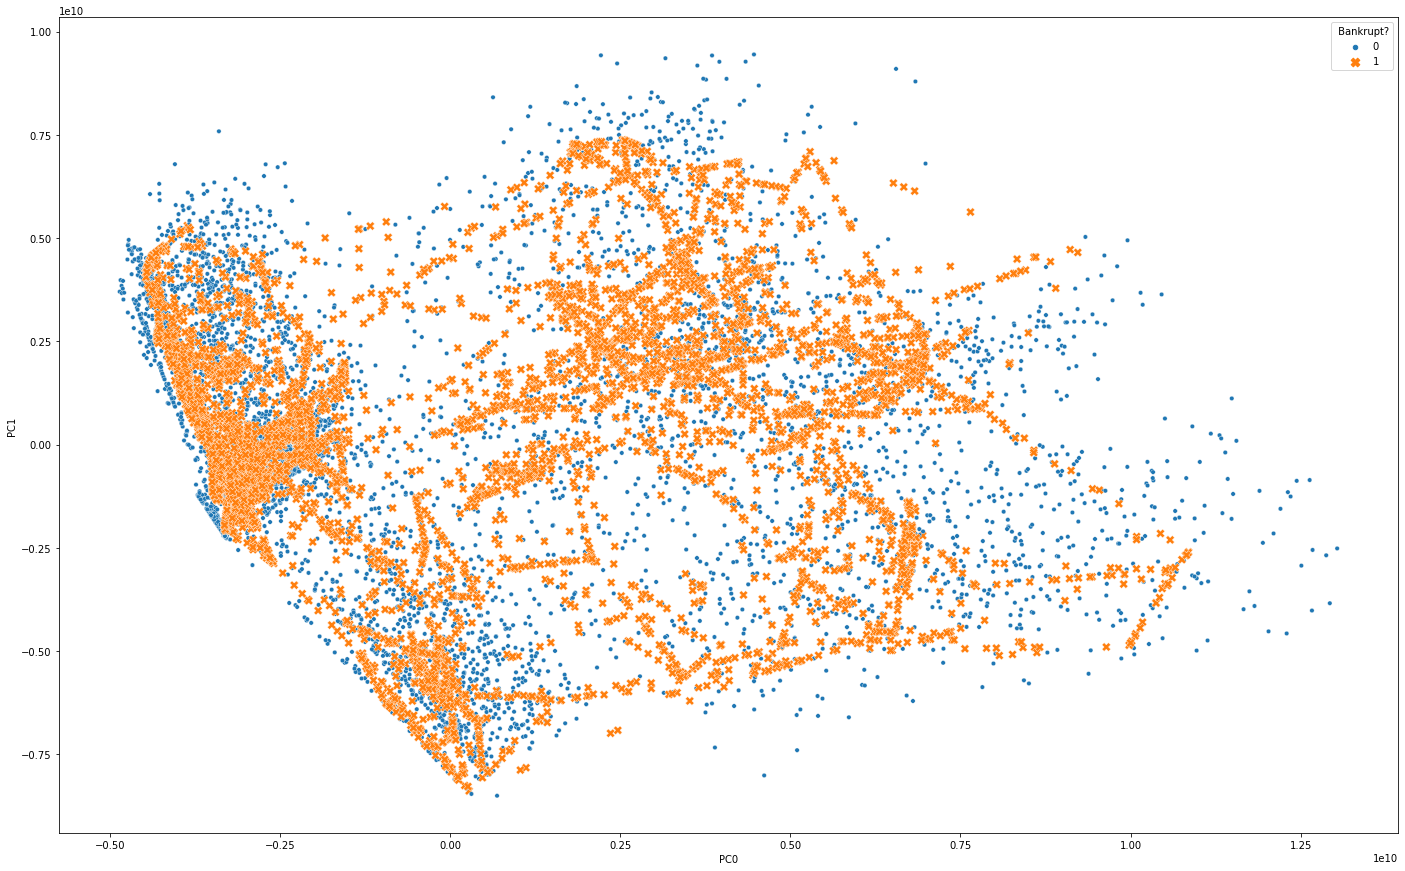

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 15)
sns.scatterplot(x_pca['PC0'], x_pca['PC1'], hue = ' Bankrupt?', style = ' Bankrupt?', data = x_pca, size=" Bankrupt?", sizes=(75, 20))

PCA 3d

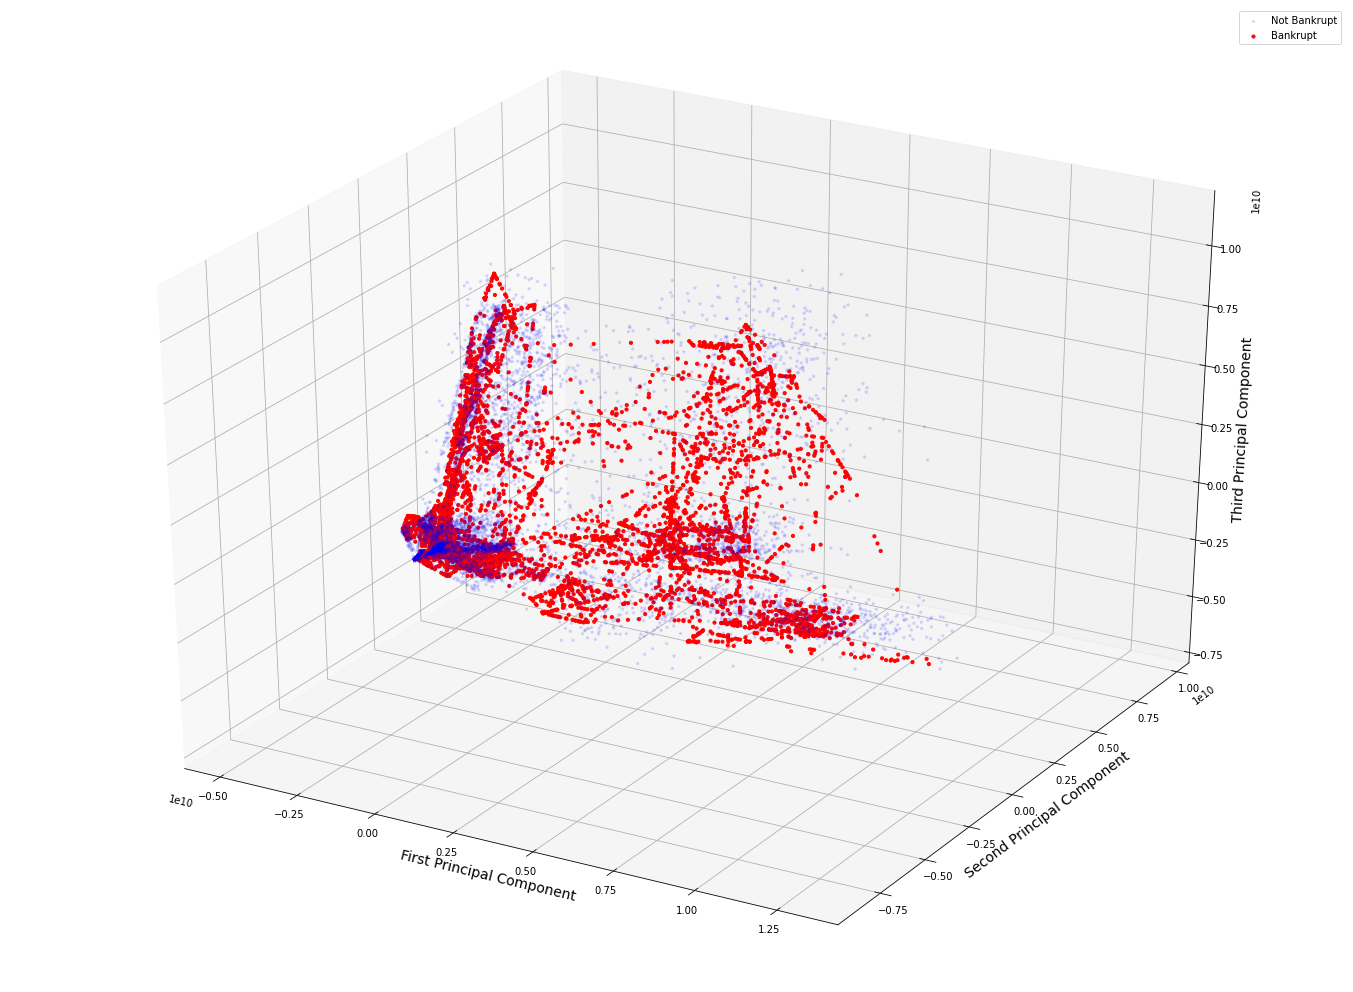

In [ ]:
pca = PCA(n_components=3)
pca.fit(x_oversampled) 
x_pca = pca.transform(x_oversampled) 

ex_variance=np.var(x_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = x_pca[:,0]
Yax = x_pca[:,1]
Zax = x_pca[:,2]

cdict = {0:'blue',1:'red'}
labl = {0:'Not Bankrupt',1:'Bankrupt'}
marker = {0:'*',1:'o'}
alpha = {0:.1, 1:.95}

fig = plt.figure(figsize=(24,18))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y_oversampled):
 ix=np.where(y_oversampled==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=10,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

TSNE 2d

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
x_tsne = tsne.fit_transform(x_oversampled)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 13198 samples in 0.001s...
[t-SNE] Computed neighbors for 13198 samples in 4.618s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13198
[t-SNE] Computed conditional probabilities for sample 2000 / 13198
[t-SNE] Computed conditional probabilities for sample 3000 / 13198
[t-SNE] Computed conditional probabilities for sample 4000 / 13198
[t-SNE] Computed conditional probabilities for sample 5000 / 13198
[t-SNE] Computed conditional probabilities for sample 6000 / 13198
[t-SNE] Computed conditional probabilities for sample 7000 / 13198
[t-SNE] Computed conditional probabilities for sample 8000 / 13198
[t-SNE] Computed conditional probabilities for sample 9000 / 13198
[t-SNE] Computed conditional probabilities for sample 10000 / 13198
[t-SNE] Computed conditional probabilities for sample 11000 / 13198
[t-SNE] Computed conditional probabilities for sample 12000 / 13198
[t-SNE] Computed conditional probabilities for sa

In [ ]:
# array to dataframe
x_tsne = pd.DataFrame(data=x_tsne[0:,0:], index=[i for i in range(x_tsne.shape[0])], columns=['TSNE'+str(i) for i in range(x_tsne.shape[1])])

In [ ]:
# insert Bankrupt colunm back to x
x_tsne[' Bankrupt?'] = y_oversampled

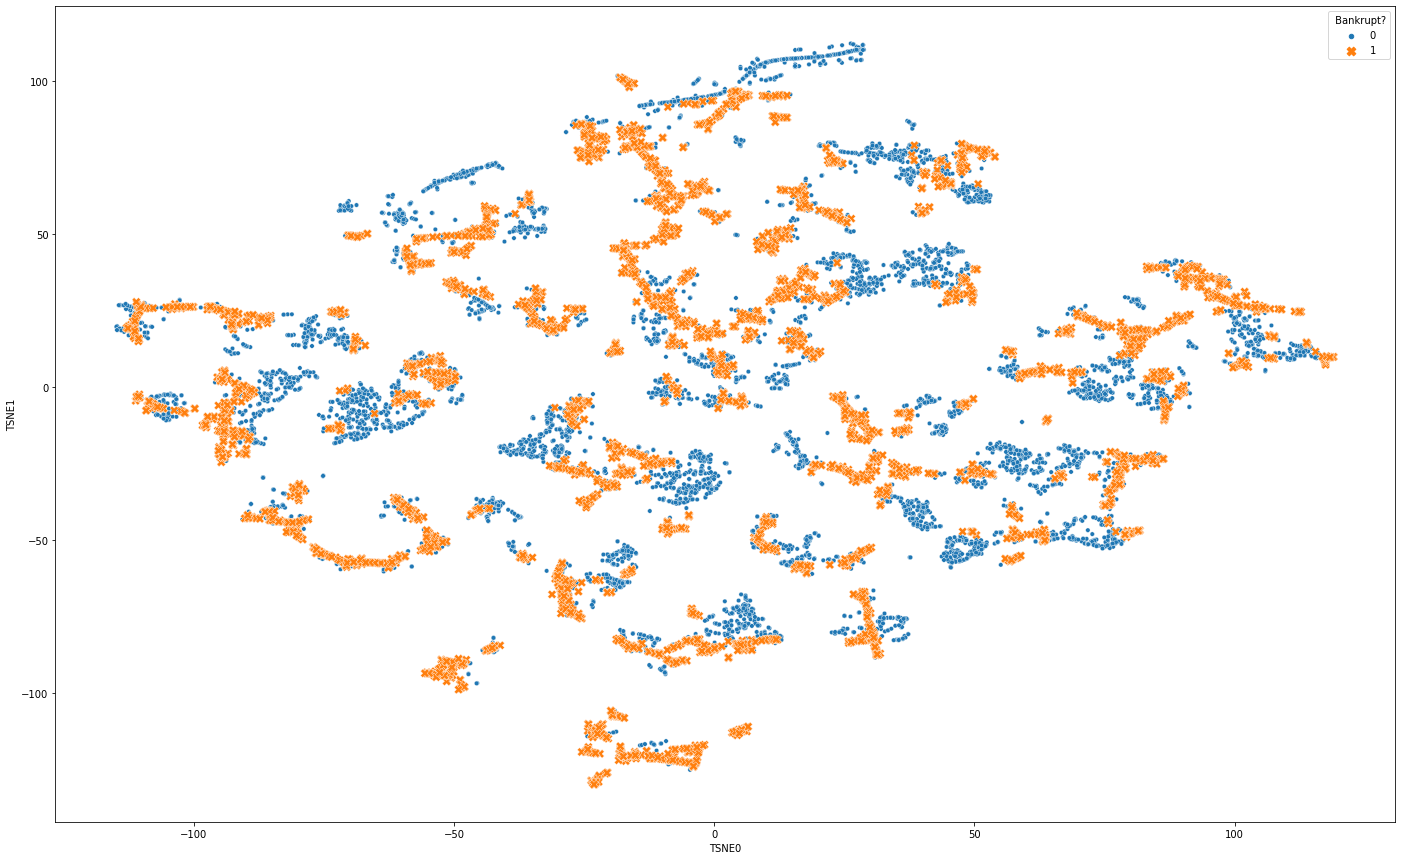

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 15)
sns.scatterplot(x_tsne['TSNE0'], x_tsne['TSNE1'], hue = ' Bankrupt?', style = ' Bankrupt?', data = x_tsne, size=" Bankrupt?", sizes=(75, 20))

TSNE 3d

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 13198 samples in 0.001s...
[t-SNE] Computed neighbors for 13198 samples in 4.227s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13198
[t-SNE] Computed conditional probabilities for sample 2000 / 13198
[t-SNE] Computed conditional probabilities for sample 3000 / 13198
[t-SNE] Computed conditional probabilities for sample 4000 / 13198
[t-SNE] Computed conditional probabilities for sample 5000 / 13198
[t-SNE] Computed conditional probabilities for sample 6000 / 13198
[t-SNE] Computed conditional probabilities for sample 7000 / 13198
[t-SNE] Computed conditional probabilities for sample 8000 / 13198
[t-SNE] Computed conditional probabilities for sample 9000 / 13198
[t-SNE] Computed conditional probabilities for sample 10000 / 13198
[t-SNE] Computed conditional probabilities for sample 11000 / 13198
[t-SNE] Computed conditional probabilities for sample 12000 / 13198
[t-SNE] Computed conditional probabilities for sa

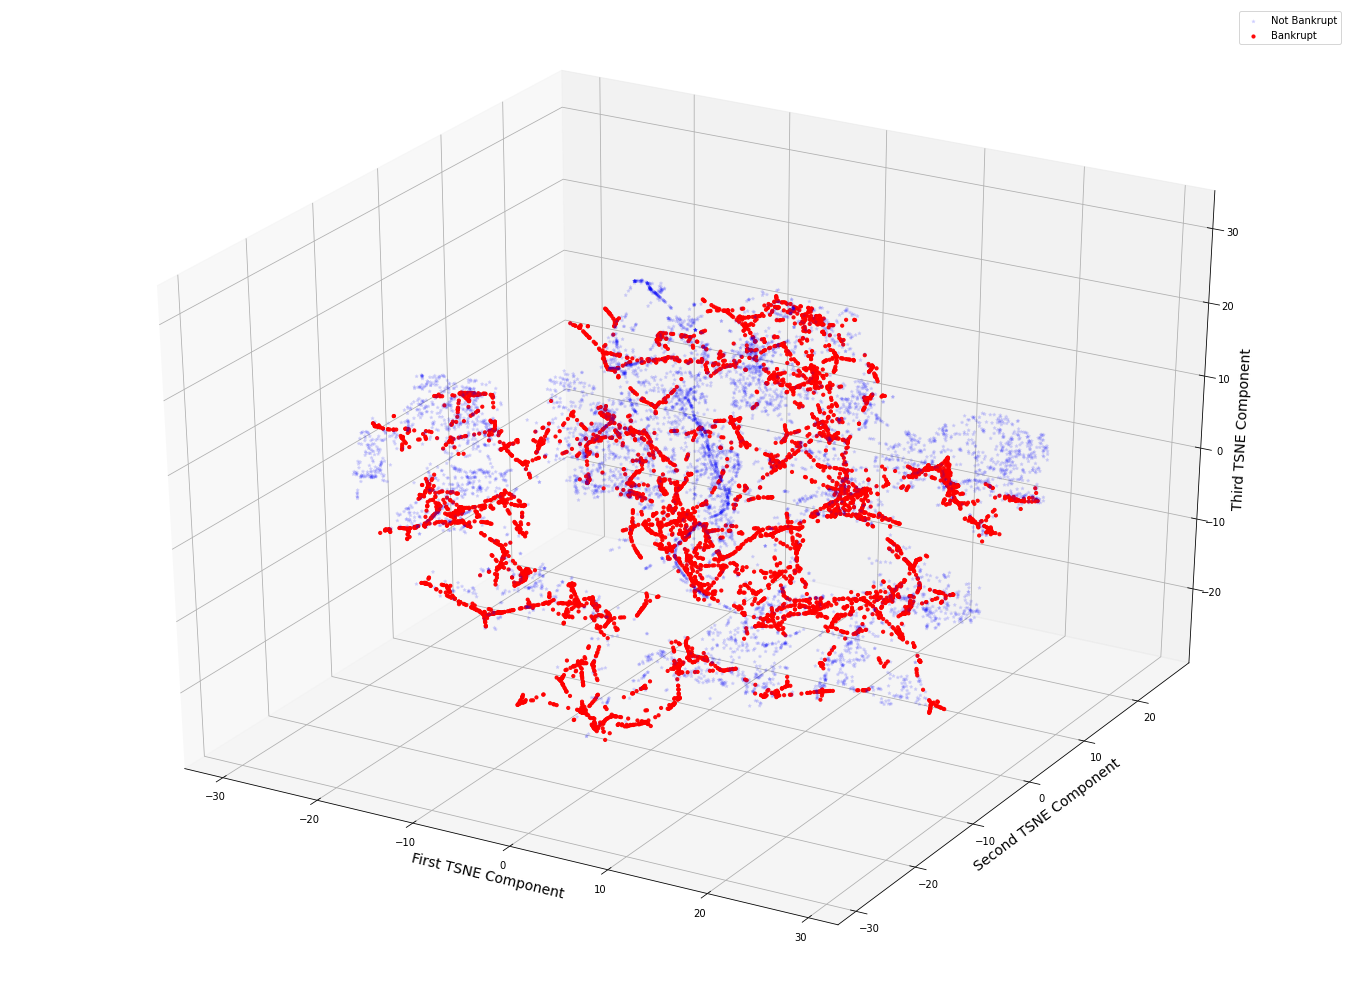

In [ ]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=2000)
x_tsne = tsne.fit_transform(x_oversampled)

ex_variance=np.var(x_tsne,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = x_tsne[:,0]
Yax = x_tsne[:,1]
Zax = x_tsne[:,2]

cdict = {0:'blue',1:'red'}
labl = {0:'Not Bankrupt',1:'Bankrupt'}
marker = {0:'*',1:'o'}
alpha = {0:.1, 1:.95}

fig = plt.figure(figsize=(24,18))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y_oversampled):
 ix=np.where(y_oversampled==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=10,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First TSNE Component", fontsize=14)
ax.set_ylabel("Second TSNE Component", fontsize=14)
ax.set_zlabel("Third TSNE Component", fontsize=14)

ax.legend()
plt.show()

UMAP 2d

In [ ]:
manifold = umap.UMAP().fit(x_oversampled, y_oversampled)
x_umap = manifold.transform(x_oversampled)

In [ ]:
# array to dataframe
x_umap = pd.DataFrame(data=x_umap[0:,0:], index=[i for i in range(x_umap.shape[0])], columns=['UMAP'+str(i) for i in range(x_umap.shape[1])])

In [ ]:
# insert Bankrupt colunm back to x
x_umap[' Bankrupt?'] = y_oversampled

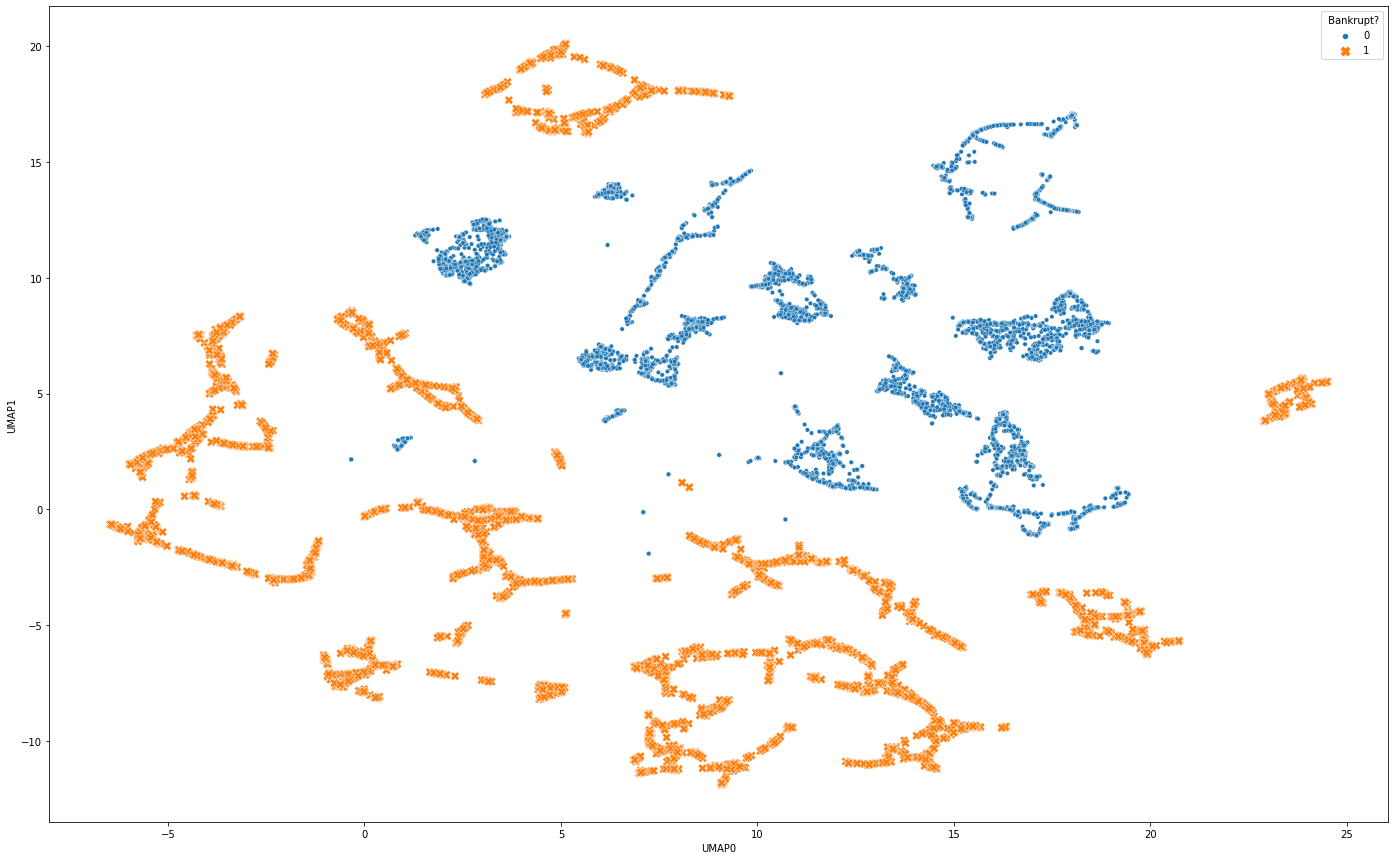

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 15)
sns.scatterplot(x_umap['UMAP0'], x_umap['UMAP1'], hue = ' Bankrupt?', style = ' Bankrupt?', data = x_umap, size=" Bankrupt?", sizes=(75, 20))

UMAP 3d

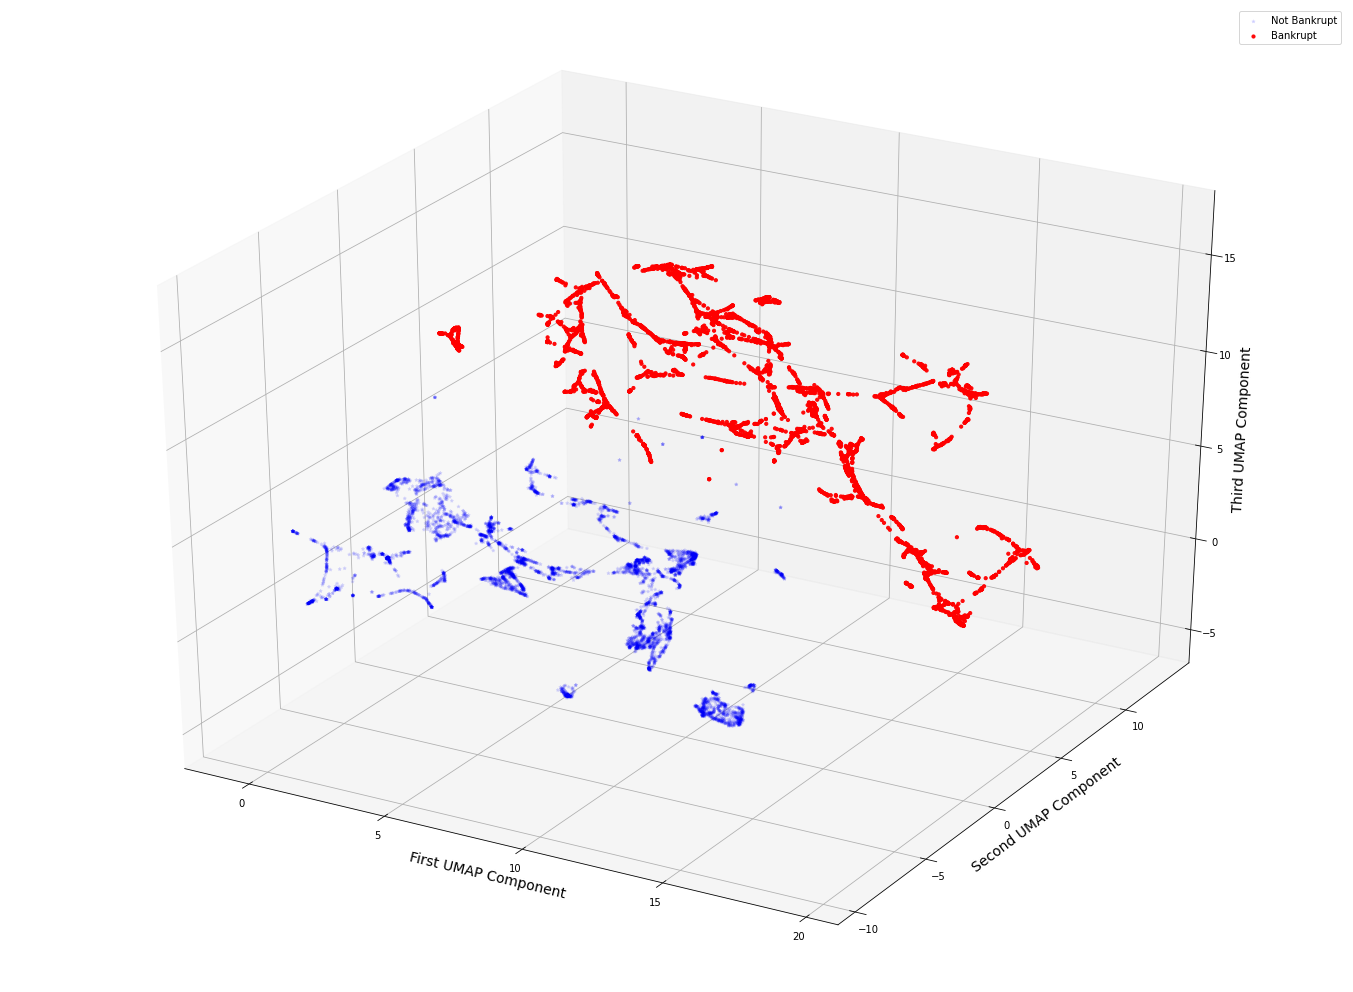

In [ ]:
manifold = umap.UMAP(n_components=3).fit(x_oversampled, y_oversampled)
x_umap = manifold.transform(x_oversampled)

ex_variance=np.var(x_umap,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = x_umap[:,0]
Yax = x_umap[:,1]
Zax = x_umap[:,2]

cdict = {0:'blue',1:'red'}
labl = {0:'Not Bankrupt',1:'Bankrupt'}
marker = {0:'*',1:'o'}
alpha = {0:.1, 1:.95}

fig = plt.figure(figsize=(24,18))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y_oversampled):
 ix=np.where(y_oversampled==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=10,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First UMAP Component", fontsize=14)
ax.set_ylabel("Second UMAP Component", fontsize=14)
ax.set_zlabel("Third UMAP Component", fontsize=14)

ax.legend()
plt.show()

#UMAP Dataset prepare

In [ ]:
x_umap = pd.DataFrame(data=x_umap[0:,0:], index=[i for i in range(x_umap.shape[0])], columns=['UMAP'+str(i) for i in range(x_umap.shape[1])])

In [ ]:
x_umap

UMAP0     UMAP1      UMAP2
0      13.419341  4.040708   8.060639
1      13.240465  6.394581   3.913467
2       8.585657  9.325577  11.497215
3      18.351339  5.687891   3.929930
4      18.133305 -0.898278   5.984307
...          ...       ...        ...
13193  13.082596 -0.104281  12.713013
13194   2.184061  7.816278   5.694434
13195  10.586163 -3.232537  14.084669
13196  11.195768 -2.571311  13.915657
13197  13.542443  4.967835   5.107646

[13198 rows x 3 columns]

In [ ]:
# ATENÇÃO: PRIMEIRO SEPARAR OS DADOS, SOMENTE DEPOIS APLICAR UMAP INDIVIDUALMENTE NO TREINO E TESTE
# AQUI ESTAMOS FAZENDO A ORDEM ERRADA, ESTAMOS APLICANDO O UMAP NO CONJUNTO INTEIRO DEPOIS SEPARANDO EM TREINO E TESTE
# ISSO TEM QUE MUDAR ASAP
x_train_oversampled_umaped, x_test_oversampled_umaped, y_train_oversampled_umaped, y_test_oversampled_umaped = train_test_split(x_umap, y_oversampled, test_size = 0.2, random_state = 0)

#LogisticRegression oversampled + UMAP 3d

In [ ]:
lr_oversampled = LogisticRegression(random_state=0, max_iter = 100000)

lr_oversampled.fit(x_train_oversampled_umaped,y_train_oversampled_umaped)
lr_oversampled_pred_class = lr_oversampled.predict(x_test_oversampled_umaped)
lr_oversampled_pred_class_original = lr_oversampled.predict(x_test_umaped)

print(classification_report(y_test_oversampled_umaped, lr_oversampled_pred_class))
print(classification_report(y_test_umaped, lr_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1269
           1       0.99      1.00      0.99      1371

    accuracy                           0.99      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       0.99      0.99      0.99      2640

              precision    recall  f1-score   support

           0       0.97      0.63      0.76      1318
           1       0.04      0.39      0.06        46

    accuracy                           0.62      1364
   macro avg       0.50      0.51      0.41      1364
weighted avg       0.94      0.62      0.74      1364



Text(0, 0.5, 'True Positive Rate')

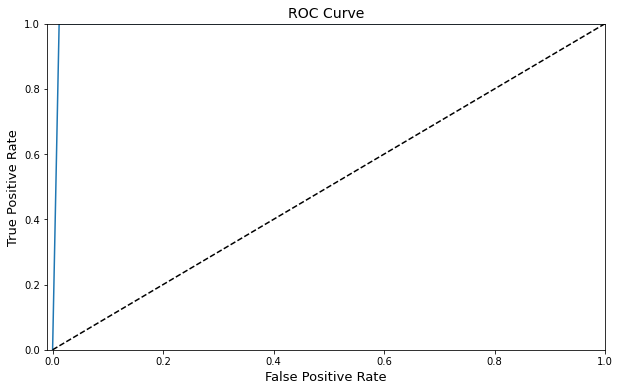

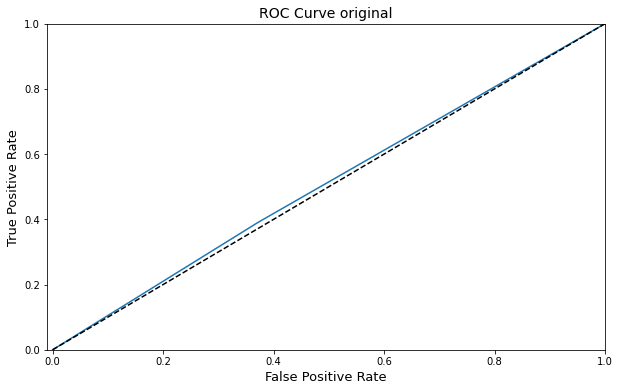

In [ ]:
log_oversampled_fpr, log_oversampled_tpr, log_oversampled_thresold = roc_curve(y_test_oversampled_umaped, lr_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(log_oversampled_fpr, log_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled_umaped, lr_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)



log_oversampled_fpr, log_oversampled_tpr, log_oversampled_thresold = roc_curve(y_test, lr_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(log_oversampled_fpr, log_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, lr_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve original', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

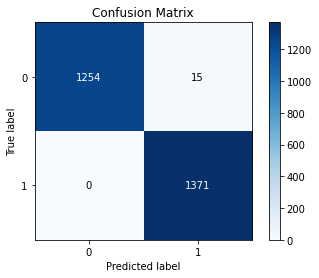

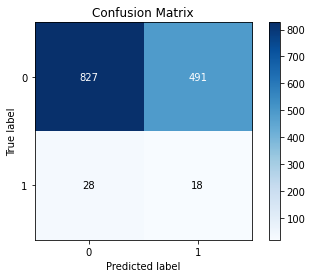

In [ ]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled_umaped, lr_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, lr_oversampled_pred_class_original)

#LinearDiscriminantAnalysis oversampled + UMAP 3d

In [ ]:
ld_oversampled = LinearDiscriminantAnalysis()

ld_oversampled.fit(x_train_oversampled_umaped,y_train_oversampled_umaped)
ld_oversampled_pred_class = ld_oversampled.predict(x_test_oversampled_umaped)
ld_oversampled_pred_class_original = ld_oversampled.predict(x_test_umaped)

print(classification_report(y_test_oversampled_umaped, ld_oversampled_pred_class))
print(classification_report(y_test_umaped, ld_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1269
           1       0.98      1.00      0.99      1371

    accuracy                           0.99      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       0.99      0.99      0.99      2640

              precision    recall  f1-score   support

           0       0.97      0.57      0.72      1318
           1       0.03      0.41      0.06        46

    accuracy                           0.57      1364
   macro avg       0.50      0.49      0.39      1364
weighted avg       0.93      0.57      0.70      1364



Text(0, 0.5, 'True Positive Rate')

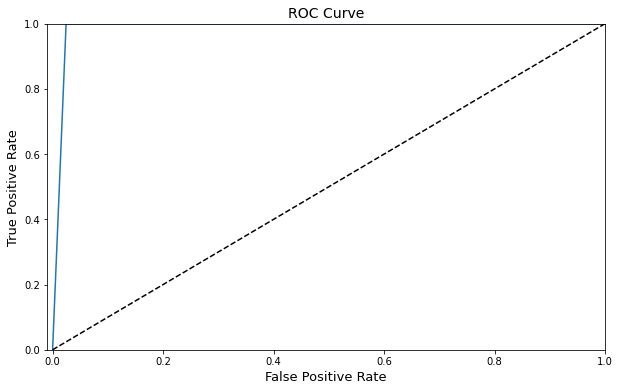

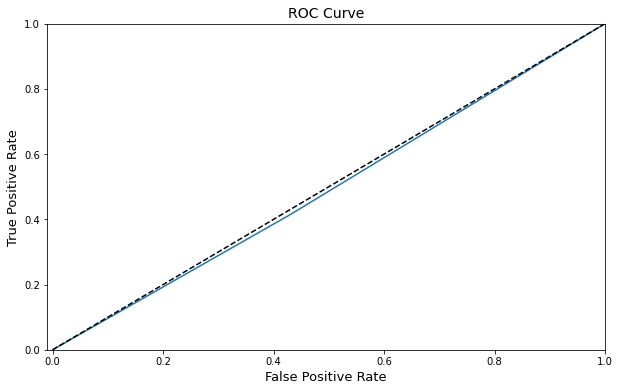

In [ ]:
ld_oversampled_fpr, ld_oversampled_tpr, ld_oversampled_thresold = roc_curve(y_test_oversampled, ld_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(ld_oversampled_fpr, ld_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, ld_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)




ld_oversampled_fpr, ld_oversampled_tpr, ld_oversampled_thresold = roc_curve(y_test, ld_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(ld_oversampled_fpr, ld_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ld_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

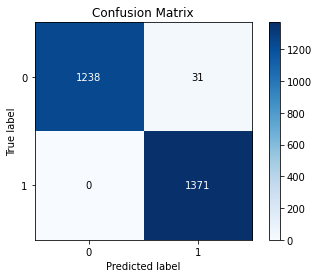

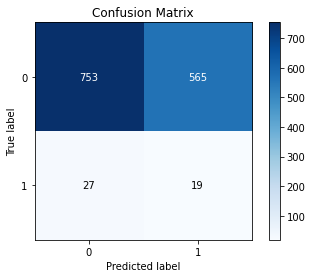

In [ ]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled_umaped, ld_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test_umaped, ld_oversampled_pred_class_original)

#LogisticRegression oversampled (top 5, ruim)

In [16]:
lr_oversampled = LogisticRegression(random_state=0, max_iter = 100000)

lr_oversampled.fit(x_train_oversampled,y_train_oversampled)
lr_oversampled_pred_class = lr_oversampled.predict(x_test_oversampled)

print(classification_report(y_test_oversampled, lr_oversampled_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1318
           1       0.04      0.28      0.07        46

    accuracy                           0.75      1364
   macro avg       0.50      0.53      0.46      1364
weighted avg       0.94      0.75      0.83      1364



Text(0, 0.5, 'True Positive Rate')

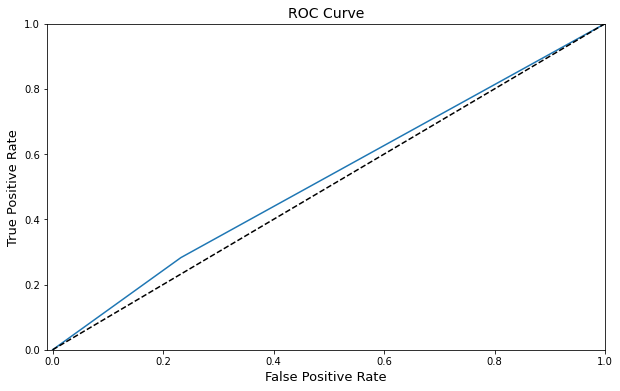

In [17]:
log_oversampled_fpr, log_oversampled_tpr, log_oversampled_thresold = roc_curve(y_test_oversampled, lr_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(log_oversampled_fpr, log_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, lr_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

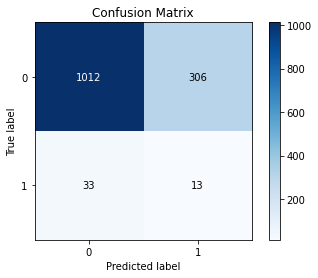

In [18]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, lr_oversampled_pred_class)

#LinearDiscriminantAnalysis oversampled (top 1)

In [19]:
ld_oversampled = LinearDiscriminantAnalysis()

ld_oversampled.fit(x_train_oversampled,y_train_oversampled)
ld_oversampled_pred_class = ld_oversampled.predict(x_test_oversampled)

print(classification_report(y_test_oversampled, ld_oversampled_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1318
           1       0.20      0.76      0.32        46

    accuracy                           0.89      1364
   macro avg       0.60      0.83      0.63      1364
weighted avg       0.96      0.89      0.92      1364



Text(0, 0.5, 'True Positive Rate')

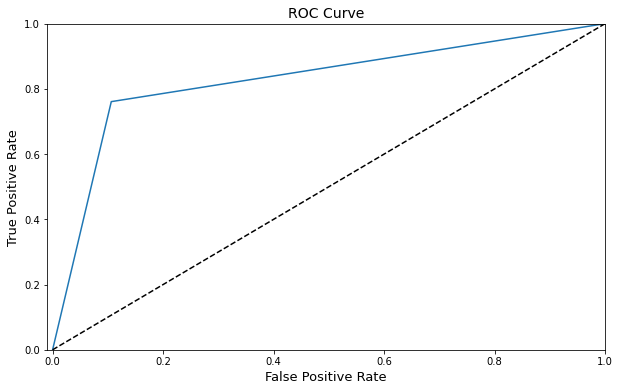

In [20]:
ld_oversampled_fpr, ld_oversampled_tpr, ld_oversampled_thresold = roc_curve(y_test_oversampled, ld_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(ld_oversampled_fpr, ld_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, ld_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

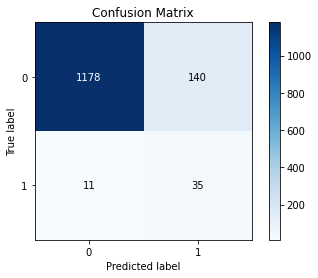

In [21]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, ld_oversampled_pred_class)

#XGBoost oversampled

In [ ]:
xgb_oversampled = XGBClassifier()

xgb_oversampled.fit(x_train_oversampled,y_train_oversampled)
xgb_oversampled_pred_class = xgb_oversampled.predict(x_test_oversampled)

print(classification_report(y_test_oversampled, xgb_oversampled_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1318
           1       0.26      0.50      0.34        46

    accuracy                           0.93      1364
   macro avg       0.62      0.72      0.65      1364
weighted avg       0.96      0.93      0.94      1364



Text(0, 0.5, 'True Positive Rate')

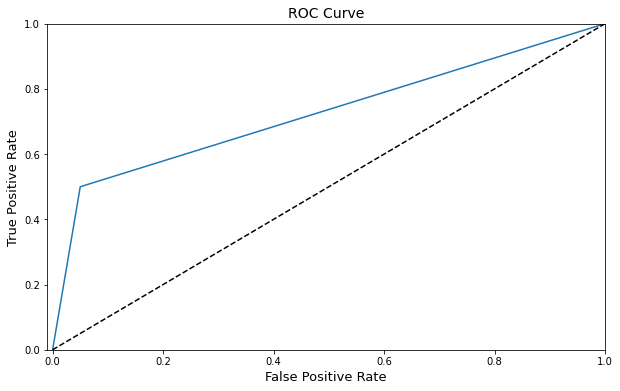

In [ ]:
xgb_oversampled_fpr, xgb_oversampled_tpr, xgb_oversampled_thresold = roc_curve(y_test_oversampled, xgb_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(xgb_oversampled_fpr, xgb_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, xgb_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

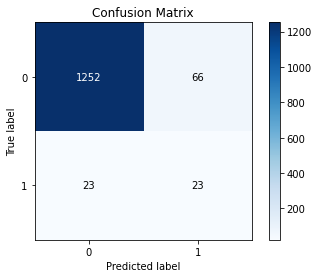

In [ ]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, xgb_oversampled_pred_class)

#SVM oversampled

In [ ]:
svc_oversampled = SVC(kernel = 'rbf')

svc_oversampled.fit(x_train_oversampled,y_train_oversampled)
svc_oversampled_pred_class = svc_oversampled.predict(x_test_oversampled)

print(classification_report(y_test_oversampled, svc_oversampled_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      1318
           1       0.07      0.43      0.12        46

    accuracy                           0.78      1364
   macro avg       0.52      0.61      0.50      1364
weighted avg       0.95      0.78      0.85      1364



Text(0, 0.5, 'True Positive Rate')

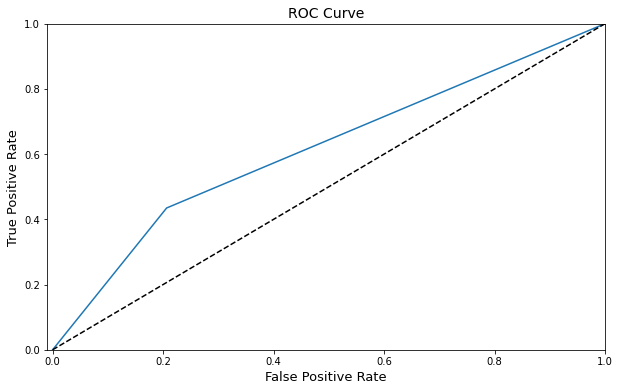

In [ ]:
svc_oversampled_fpr, svc_oversampled_tpr, svc_oversampled_thresold = roc_curve(y_test_oversampled, svc_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(svc_oversampled_fpr, svc_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, svc_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

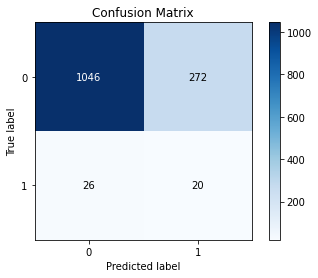

In [ ]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, svc_oversampled_pred_class)

#Random Forest oversampled

In [ ]:
rf_oversampled = RandomForestClassifier()

rf_oversampled.fit(x_train_oversampled,y_train_oversampled)
rf_oversampled_pred_class = rf_oversampled.predict(x_test_oversampled)

print(classification_report(y_test_oversampled, rf_oversampled_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1318
           1       0.38      0.41      0.40        46

    accuracy                           0.96      1364
   macro avg       0.68      0.69      0.69      1364
weighted avg       0.96      0.96      0.96      1364



Text(0, 0.5, 'True Positive Rate')

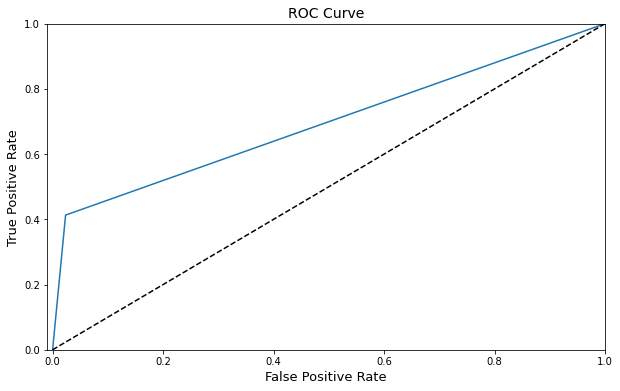

In [ ]:
rf_oversampled_fpr, rf_oversampled_tpr, rf_oversampled_thresold = roc_curve(y_test_oversampled, rf_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(rf_oversampled_fpr, rf_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, rf_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

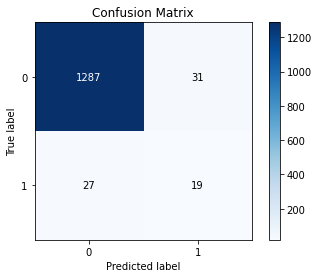

In [ ]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, rf_oversampled_pred_class)

#Importância de cada feature (de acordo com a random forest)

In [ ]:
importances = pd.DataFrame({'feature':x_train_oversampled.columns,'importance':np.round(rf_oversampled.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances = importances.transpose()
importances

feature      Persistent EPS in the Last Four Seasons  ...   Net Income Flag
importance                                     0.075  ...               0.0

[1 rows x 95 columns]

#KNN oversampled

In [ ]:
knn_oversampled = KNeighborsClassifier(n_neighbors = 5)

knn_oversampled.fit(x_train_oversampled,y_train_oversampled)
knn_oversampled_pred_class = knn_oversampled.predict(x_test_oversampled)

print(classification_report(y_test_oversampled, knn_oversampled_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1318
           1       0.08      0.35      0.13        46

    accuracy                           0.84      1364
   macro avg       0.53      0.60      0.52      1364
weighted avg       0.94      0.84      0.89      1364



Text(0, 0.5, 'True Positive Rate')

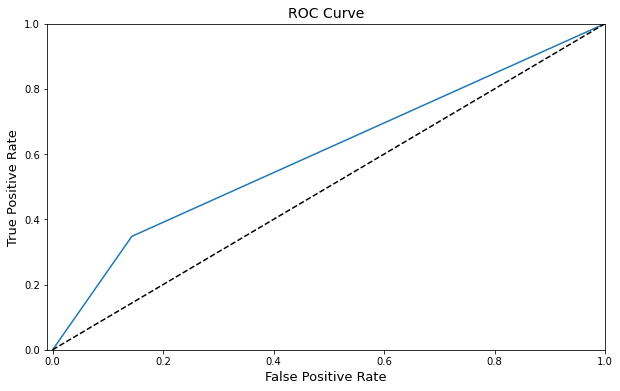

In [ ]:
knn_oversampled_fpr, knn_oversampled_tpr, knn_oversampled_thresold = roc_curve(y_test_oversampled, knn_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(knn_oversampled_fpr, knn_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, knn_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

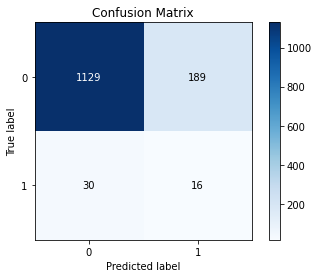

In [ ]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, knn_oversampled_pred_class)

#Neural Network oversampled

In [ ]:
mlp_oversampled = MLPClassifier(solver='adam', max_iter=1000, alpha=1e-5, hidden_layer_sizes=(20,20), random_state=1)

mlp_oversampled.fit(x_train_oversampled, y_train_oversampled)
mlp_oversampled_pred_class = mlp_oversampled.predict(x_test_oversampled)

print(classification_report(y_test_oversampled, mlp_oversampled_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.56      0.71      1318
           1       0.04      0.48      0.07        46

    accuracy                           0.56      1364
   macro avg       0.50      0.52      0.39      1364
weighted avg       0.94      0.56      0.69      1364



Text(0, 0.5, 'True Positive Rate')

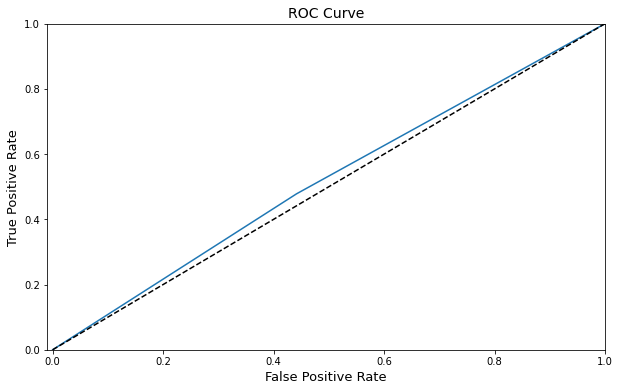

In [ ]:
mlp_oversampled_fpr, mlp_oversampled_tpr, mlp_oversampled_thresold = roc_curve(y_test_oversampled, mlp_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(mlp_oversampled_fpr, mlp_oversampled_tpr, label='mlp_oversampled Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, mlp_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

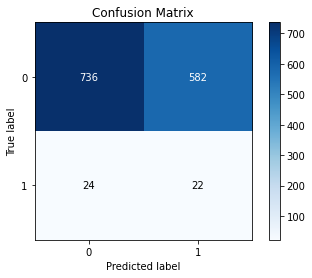

In [ ]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, mlp_oversampled_pred_class)

#XGBoost tuning with sherpa + SMOTE (top 3)

In [ ]:
parameters_xgb = [sherpa.Continuous('learning_rate', [0.001, 0.1]),
              sherpa.Discrete('max_depth', [3, 10]),
              sherpa.Discrete('min_child_weight', [1, 5]),
              sherpa.Continuous('subsample', [0.5, 0.7]),
              sherpa.Continuous('colsample_bytree', [0.5, 0.7]),
              sherpa.Discrete('n_estimators', [100, 500])]

algorithm_xgb = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=20)

In [ ]:
study_xgb = sherpa.Study(parameters=parameters_xgb,
                     algorithm=algorithm_xgb,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8880 if on a cluster or
http://localhost:8880 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [ ]:
for trial in study_xgb:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    xgb = XGBClassifier(learning_rate=trial.parameters['learning_rate'],
                                 max_depth=int(trial.parameters['max_depth']),
                                 min_child_weight=int(trial.parameters['min_child_weight']),
                                 subsample=trial.parameters['subsample'],
                                 colsample_bytree=trial.parameters['colsample_bytree'],
                                 n_estimators=int(trial.parameters['n_estimators']),
                                 objective= 'reg:squarederror')
    
    xgb.fit(x_train_oversampled2, y_train_oversampled2)
    xgb_pred_class = xgb.predict(x_test_oversampled2)

    xgb_f1 = f1_score(y_test_oversampled2, xgb_pred_class)

    print("F1 score: ", xgb_f1)
    study_xgb.add_observation(trial, iteration=1, objective=xgb_f1)
    study_xgb.finalize(trial)
print(study_xgb.get_best_result())

Trial  1  with parameters  {'learning_rate': 0.008926099715277941, 'max_depth': 6, 'min_child_weight': 4, 'subsample': 0.6214005717803267, 'colsample_bytree': 0.5161351256237497, 'n_estimators': 473}
F1 score:  0.37037037037037035
Trial  2  with parameters  {'learning_rate': 0.0785737872510284, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6108523530934598, 'colsample_bytree': 0.6262793559663236, 'n_estimators': 251}
F1 score:  0.3333333333333333
Trial  3  with parameters  {'learning_rate': 0.09320052828260732, 'max_depth': 5, 'min_child_weight': 2, 'subsample': 0.5312479956061509, 'colsample_bytree': 0.5825634666923538, 'n_estimators': 353}
F1 score:  0.34782608695652173
Trial  4  with parameters  {'learning_rate': 0.04360618148631669, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.6306125135081864, 'colsample_bytree': 0.6093217958620214, 'n_estimators': 260}
F1 score:  0.37209302325581395
Trial  5  with parameters  {'learning_rate': 0.06025327554042677, 'max_depth': 4,

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.4406779661016949
Trial  8  with parameters  {'learning_rate': 0.004726662746982183, 'max_depth': 9.0, 'min_child_weight': 2.0, 'subsample': 0.591761876469724, 'colsample_bytree': 0.6817541818342225, 'n_estimators': 268.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.4406779661016949
Trial  9  with parameters  {'learning_rate': 0.1, 'max_depth': 10.0, 'min_child_weight': 1.0, 'subsample': 0.7, 'colsample_bytree': 0.5, 'n_estimators': 269.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.4186046511627907
Trial  10  with parameters  {'learning_rate': 0.005832379195070871, 'max_depth': 9.0, 'min_child_weight': 2.0, 'subsample': 0.592945264344473, 'colsample_bytree': 0.6785918687405201, 'n_estimators': 268.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.42857142857142855
Trial  11  with parameters  {'learning_rate': 0.001, 'max_depth': 9.0, 'min_child_weight': 2.0, 'subsample': 0.5, 'colsample_bytree': 0.7, 'n_estimators': 268.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.417910447761194
Trial  12  with parameters  {'learning_rate': 0.001, 'max_depth': 9.0, 'min_child_weight': 2.0, 'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 268.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.39999999999999997
Trial  13  with parameters  {'learning_rate': 0.007642354585040375, 'max_depth': 9.0, 'min_child_weight': 2.0, 'subsample': 0.5627650746034208, 'colsample_bytree': 0.6697761164598276, 'n_estimators': 268.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.35714285714285715
Trial  14  with parameters  {'learning_rate': 0.001, 'max_depth': 10.0, 'min_child_weight': 2.0, 'subsample': 0.5, 'colsample_bytree': 0.7, 'n_estimators': 269.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.36923076923076925
Trial  15  with parameters  {'learning_rate': 0.009658249885604516, 'max_depth': 9.0, 'min_child_weight': 2.0, 'subsample': 0.6287683387791542, 'colsample_bytree': 0.7, 'n_estimators': 268.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.37735849056603776
Trial  16  with parameters  {'learning_rate': 0.001, 'max_depth': 9.0, 'min_child_weight': 2.0, 'subsample': 0.5, 'colsample_bytree': 0.6882379554823819, 'n_estimators': 268.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.417910447761194
Trial  17  with parameters  {'learning_rate': 0.05368082042614175, 'max_depth': 8.0, 'min_child_weight': 1.0, 'subsample': 0.6217602423115206, 'colsample_bytree': 0.5410894600228279, 'n_estimators': 268.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.3414634146341463
Trial  18  with parameters  {'learning_rate': 0.001, 'max_depth': 9.0, 'min_child_weight': 2.0, 'subsample': 0.5, 'colsample_bytree': 0.7, 'n_estimators': 268.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.417910447761194
Trial  19  with parameters  {'learning_rate': 0.0036763235737108197, 'max_depth': 9.0, 'min_child_weight': 3.0, 'subsample': 0.5399799073901668, 'colsample_bytree': 0.5778942973134813, 'n_estimators': 338.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.4590163934426229
Trial  20  with parameters  {'learning_rate': 0.004546769662309198, 'max_depth': 9.0, 'min_child_weight': 3.0, 'subsample': 0.5404510913746268, 'colsample_bytree': 0.5776811781861746, 'n_estimators': 338.0}
F1 score:  0.43333333333333335
{'Trial-ID': 19, 'Iteration': 1, 'colsample_bytree': 0.5778942973134813, 'learning_rate': 0.0036763235737108197, 'max_depth': 9.0, 'min_child_weight': 3.0, 'n_estimators': 338.0, 'subsample': 0.5399799073901668, 'Objective': 0.4590163934426229}


In [ ]:
xgb_oversampled = XGBClassifier(learning_rate=0.0036763235737108197,
                                 max_depth=9,
                                 min_child_weight=3,
                                 subsample=0.5399799073901668,
                                 colsample_bytree=0.5778942973134813,
                                 n_estimators=338,
                                 objective= 'reg:squarederror')

xgb_oversampled.fit(x_train_oversampled2,y_train_oversampled2)
xgb_oversampled_pred_class = xgb_oversampled.predict(x_test_oversampled2)
xgb_oversampled_pred_class_val = xgb_oversampled.predict(x_validation_oversampled)

print(classification_report(y_test_oversampled2, xgb_oversampled_pred_class))
print(classification_report(y_validation_oversampled, xgb_oversampled_pred_class_val))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       662
           1       0.34      0.70      0.46        20

    accuracy                           0.95       682
   macro avg       0.67      0.83      0.72       682
weighted avg       0.97      0.95      0.96       682

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       656
           1       0.39      0.54      0.45        26

    accuracy                           0.95       682
   macro avg       0.69      0.75      0.71       682
weighted avg       0.96      0.95      0.95       682



Text(0, 0.5, 'True Positive Rate')

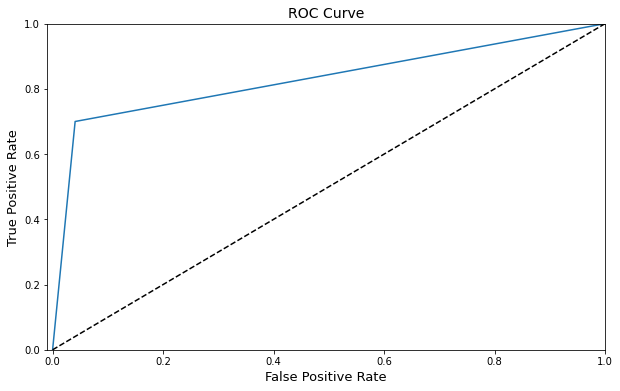

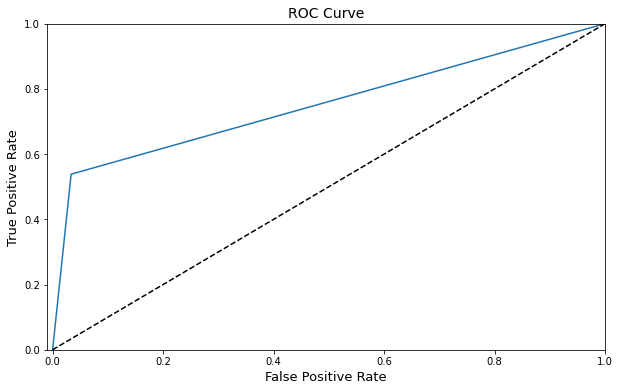

In [ ]:
xgb_oversampled_fpr, xgb_oversampled_tpr, xgb_oversampled_thresold = roc_curve(y_test_oversampled2, xgb_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(xgb_oversampled_fpr, xgb_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled2, xgb_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)


xgb_oversampled_fpr, xgb_oversampled_tpr, xgb_oversampled_thresold = roc_curve(y_validation_oversampled, xgb_oversampled_pred_class_val)

plt.figure(figsize=(10,6))
plt.plot(xgb_oversampled_fpr, xgb_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_validation_oversampled, xgb_oversampled_pred_class_val)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

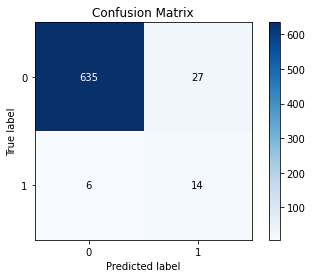

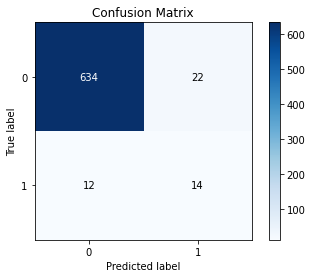

In [ ]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled2, xgb_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_validation_oversampled, xgb_oversampled_pred_class_val)

#SVM tuning with sherpa + SMOTE (relativamente inutil)

In [ ]:
parameters_svc = [sherpa.Continuous('C', [0.1, 1]),
              sherpa.Continuous('gamma', [1, 0.001]),
              sherpa.Choice('class_weight', ['balanced', None])]

algorithm_svc = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=20)

In [ ]:
study_svc = sherpa.Study(parameters=parameters_svc,
                     algorithm=algorithm_svc,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8881 if on a cluster or
http://localhost:8881 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [ ]:
for trial in study_svc:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    svc = SVC(C=trial.parameters['C'],
                                 gamma=trial.parameters['gamma'],
                                 kernel = 'rbf',
                                 class_weight=trial.parameters['class_weight'])
    
    svc.fit(x_train_oversampled2, y_train_oversampled2)
    svc_pred_class = svc.predict(x_test_oversampled2)

    svc_f1 = f1_score(y_test_oversampled2, svc_pred_class)

    print("F1 score: ", svc_f1)
    study_svc.add_observation(trial, iteration=1, objective=svc_f1)
    study_svc.finalize(trial)
print(study_svc.get_best_result())




Trial  1  with parameters  {'C': 0.19503403098198635, 'gamma': 0.5584043566255408, 'class_weight': 'balanced'}
F1 score:  0.05730659025787966
Trial  2  with parameters  {'C': 0.7960070444011038, 'gamma': 0.5722582642599532, 'class_weight': 'balanced'}
F1 score:  0.058139534883720936
Trial  3  with parameters  {'C': 0.8948943552405603, 'gamma': 0.7505339677454808, 'class_weight': None}
F1 score:  0.058139534883720936
Trial  4  with parameters  {'C': 0.5311484349296509, 'gamma': 0.5331948313788053, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.05780346820809249
Trial  5  with parameters  {'C': 0.9942861287881504, 'gamma': 1.0, 'class_weight': None}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.058139534883720936
Trial  6  with parameters  {'C': 0.9964680170416428, 'gamma': 1.0, 'class_weight': None}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.058139534883720936
Trial  7  with parameters  {'C': 0.7282972724827981, 'gamma': 1.0, 'class_weight': None}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.058139534883720936
Trial  8  with parameters  {'C': 0.9813938464861458, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.058139534883720936
Trial  9  with parameters  {'C': 0.9984428642811178, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.058139534883720936
Trial  10  with parameters  {'C': 0.9985095818116897, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.058139534883720936
Trial  11  with parameters  {'C': 0.9885154092169399, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.058139534883720936
Trial  12  with parameters  {'C': 0.9609464174382707, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.058139534883720936
Trial  13  with parameters  {'C': 0.9818048954327967, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.058139534883720936
Trial  14  with parameters  {'C': 0.9594497521435053, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.058139534883720936
Trial  15  with parameters  {'C': 0.9784222556806292, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.058139534883720936
Trial  16  with parameters  {'C': 0.9952529458398202, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.058139534883720936
Trial  17  with parameters  {'C': 0.9805040548375643, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.058139534883720936
Trial  18  with parameters  {'C': 0.9922456209744148, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.058139534883720936
Trial  19  with parameters  {'C': 0.9953408076774255, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.058139534883720936
Trial  20  with parameters  {'C': 0.9919983896075157, 'gamma': 1.0, 'class_weight': 'balanced'}
F1 score:  0.058139534883720936
{'Trial-ID': 2, 'Iteration': 1, 'C': 0.7960070444011038, 'class_weight': 'balanced', 'gamma': 0.5722582642599532, 'Objective': 0.058139534883720936}


In [ ]:
svc_oversampled = SVC(C=0.7960070444011038,
                                 class_weight='balanced',
                                 gamma=0.5722582642599532,
                                 kernel='rbf')

svc_oversampled.fit(x_train_oversampled2,y_train_oversampled2)
svc_oversampled_pred_class = svc_oversampled.predict(x_test_oversampled2)
svc_oversampled_pred_class_val = svc_oversampled.predict(x_validation_oversampled)

print(classification_report(y_test_oversampled2, svc_oversampled_pred_class))
print(classification_report(y_validation_oversampled, svc_oversampled_pred_class_val))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04       662
           1       0.03      1.00      0.06        20

    accuracy                           0.05       682
   macro avg       0.51      0.51      0.05       682
weighted avg       0.97      0.05      0.04       682

              precision    recall  f1-score   support

           0       1.00      0.03      0.06       656
           1       0.04      1.00      0.08        26

    accuracy                           0.07       682
   macro avg       0.52      0.52      0.07       682
weighted avg       0.96      0.07      0.07       682



Text(0, 0.5, 'True Positive Rate')

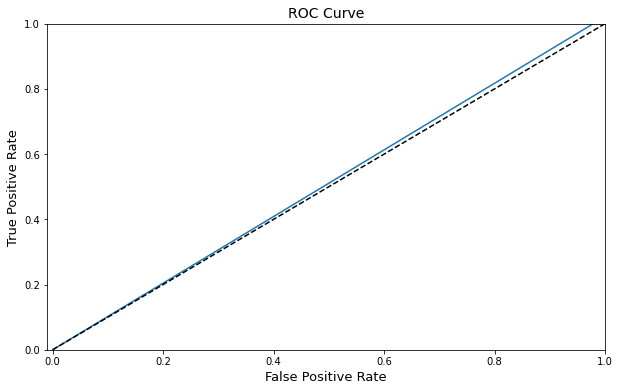

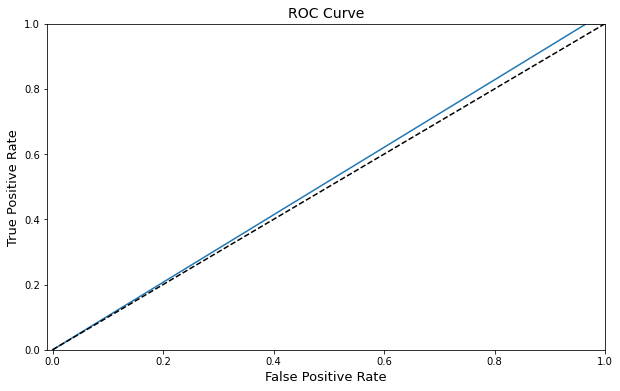

In [ ]:
svc_oversampled_fpr, svc_oversampled_tpr, svc_oversampled_thresold = roc_curve(y_test_oversampled2, svc_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(svc_oversampled_fpr, svc_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled2, svc_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)


svc_oversampled_fpr, svc_oversampled_tpr, svc_oversampled_thresold = roc_curve(y_validation_oversampled, svc_oversampled_pred_class_val)

plt.figure(figsize=(10,6))
plt.plot(svc_oversampled_fpr, svc_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_validation_oversampled, svc_oversampled_pred_class_val)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

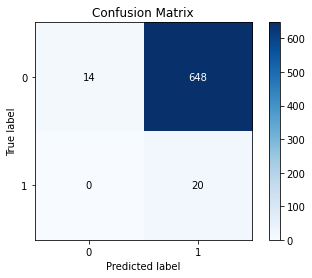

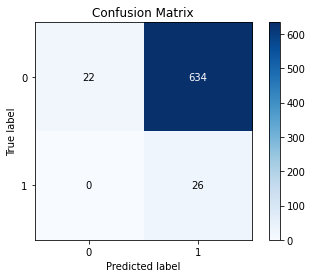

In [ ]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled2, svc_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_validation_oversampled, svc_oversampled_pred_class_val)

#Random Forest tuning with sherpa + SMOTE (top 2)

In [ ]:
parameters_rf = [sherpa.Discrete('max_depth', [10, 100]),
              sherpa.Choice('max_features', ['auto', 'sqrt']),
              sherpa.Discrete('min_samples_leaf', [1, 4]),
              sherpa.Discrete('min_samples_split', [2, 10]),
              sherpa.Discrete('n_estimators', [200, 2000]),
              sherpa.Choice('class_weight', ['balanced', None]),
              sherpa.Choice('criterion', ['gini', 'entropy'])]

algorithm_rf = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=20)

In [ ]:
study_rf = sherpa.Study(parameters=parameters_rf,
                     algorithm=algorithm_rf,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8882 if on a cluster or
http://localhost:8882 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [ ]:
for trial in study_rf:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    rf = RandomForestClassifier(max_depth=int(trial.parameters['max_depth']),
                                 max_features=trial.parameters['max_features'],
                                 min_samples_leaf=int(trial.parameters['min_samples_leaf']),
                                 min_samples_split=int(trial.parameters['min_samples_split']),
                                 n_estimators=int(trial.parameters['n_estimators']),
                                 class_weight=trial.parameters['class_weight'],
                                 criterion=trial.parameters['criterion'])
    
    rf.fit(x_train_oversampled2, y_train_oversampled2)
    rf_pred_class = rf.predict(x_test_oversampled2)

    rf_f1 = f1_score(y_test_oversampled2, rf_pred_class)

    print("F1 score: ", rf_f1)
    study_rf.add_observation(trial, iteration=1, objective=rf_f1)
    study_rf.finalize(trial)
print(study_rf.get_best_result())




Trial  1  with parameters  {'max_depth': 51, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 1512, 'class_weight': 'balanced', 'criterion': 'entropy'}
F1 score:  0.4444444444444445
Trial  2  with parameters  {'max_depth': 21, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 690, 'class_weight': None, 'criterion': 'entropy'}
F1 score:  0.4
Trial  3  with parameters  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1430, 'class_weight': 'balanced', 'criterion': 'entropy'}
F1 score:  0.43636363636363634
Trial  4  with parameters  {'max_depth': 36, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 432, 'class_weight': None, 'criterion': 'gini'}
F1 score:  0.4489795918367347
Trial  5  with parameters  {'max_depth': 90, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 1934, 'class_weight

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.42307692307692313
Trial  9  with parameters  {'max_depth': 36, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 432, 'class_weight': None, 'criterion': 'gini'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.3829787234042553
Trial  10  with parameters  {'max_depth': 51, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 1512, 'class_weight': 'balanced', 'criterion': 'entropy'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.4074074074074075
Trial  11  with parameters  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1430, 'class_weight': 'balanced', 'criterion': 'entropy'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.456140350877193
Trial  12  with parameters  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1430, 'class_weight': 'balanced', 'criterion': 'entropy'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.42857142857142855
Trial  13  with parameters  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1430, 'class_weight': 'balanced', 'criterion': 'entropy'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.37735849056603776
Trial  14  with parameters  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1430, 'class_weight': 'balanced', 'criterion': 'entropy'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.42857142857142855
Trial  15  with parameters  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1430, 'class_weight': 'balanced', 'criterion': 'entropy'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.4210526315789474
Trial  16  with parameters  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1430, 'class_weight': 'balanced', 'criterion': 'entropy'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.4210526315789474
Trial  17  with parameters  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1430, 'class_weight': 'balanced', 'criterion': 'entropy'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.4
Trial  18  with parameters  {'max_depth': 51, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 1512, 'class_weight': 'balanced', 'criterion': 'entropy'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.38461538461538464
Trial  19  with parameters  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1430, 'class_weight': 'balanced', 'criterion': 'entropy'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.43636363636363634
Trial  20  with parameters  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1430, 'class_weight': 'balanced', 'criterion': 'entropy'}
F1 score:  0.42857142857142855
{'Trial-ID': 11, 'Iteration': 1, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1430, 'Objective': 0.456140350877193}


In [ ]:
rf_oversampled = RandomForestClassifier(max_depth=30,
                                 max_features='sqrt',
                                 min_samples_leaf=3,
                                 min_samples_split=3,
                                 n_estimators=1430,
                                 class_weight='balanced',
                                 criterion='entropy')

rf_oversampled.fit(x_train_oversampled2,y_train_oversampled2)
rf_oversampled_pred_class = rf_oversampled.predict(x_test_oversampled2)
rf_oversampled_pred_class_val = rf_oversampled.predict(x_validation_oversampled)

print(classification_report(y_test_oversampled2, rf_oversampled_pred_class))
print(classification_report(y_validation_oversampled, rf_oversampled_pred_class_val))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       662
           1       0.34      0.60      0.44        20

    accuracy                           0.95       682
   macro avg       0.67      0.78      0.71       682
weighted avg       0.97      0.95      0.96       682

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       656
           1       0.45      0.58      0.51        26

    accuracy                           0.96       682
   macro avg       0.72      0.77      0.74       682
weighted avg       0.96      0.96      0.96       682



Text(0, 0.5, 'True Positive Rate')

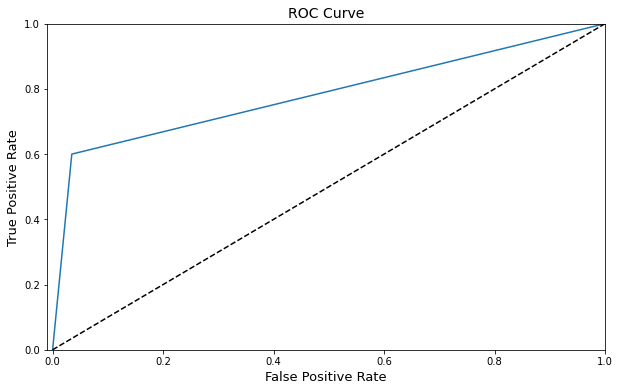

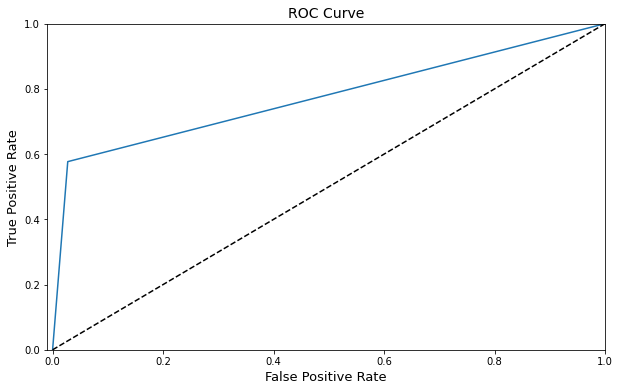

In [ ]:
rf_oversampled_fpr, rf_oversampled_tpr, rf_oversampled_thresold = roc_curve(y_test_oversampled2, rf_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(rf_oversampled_fpr, rf_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled2, rf_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)


rf_oversampled_fpr, rf_oversampled_tpr, rf_oversampled_thresold = roc_curve(y_validation_oversampled, rf_oversampled_pred_class_val)

plt.figure(figsize=(10,6))
plt.plot(rf_oversampled_fpr, rf_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_validation_oversampled, rf_oversampled_pred_class_val)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

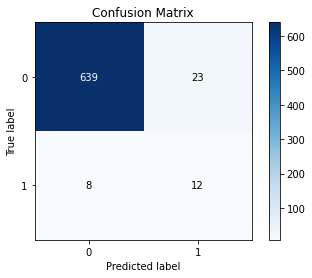

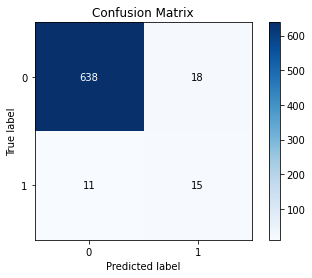

In [ ]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled2, rf_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_validation_oversampled, rf_oversampled_pred_class_val)

#KNN tuning with sherpa + SMOTE (top 4, ruim)

In [ ]:
parameters_knn = [sherpa.Discrete('n_neighbors', [3, 15]),
              sherpa.Discrete('leaf_size', [20, 50]),
              sherpa.Choice('algorithm', ['ball_tree', 'kd_tree', 'brute']),
              sherpa.Choice('weights', ['uniform', 'distance'])]

algorithm_knn = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=20)

In [ ]:
study_knn = sherpa.Study(parameters=parameters_knn,
                     algorithm=algorithm_knn,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8880 if on a cluster or
http://localhost:8880 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [ ]:
for trial in study_knn:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    knn = KNeighborsClassifier(n_neighbors=trial.parameters['n_neighbors'],
                                 leaf_size=int(trial.parameters['leaf_size']),
                                 algorithm=trial.parameters['algorithm'],
                                 weights=trial.parameters['weights'])
    knn.fit(x_train_oversampled2, y_train_oversampled2)
    knn_pred_class = knn.predict(x_test_oversampled2)

    knn_f1 = f1_score(y_test_oversampled2, knn_pred_class)

    print("F1 score: ", knn_f1)
    study_knn.add_observation(trial, iteration=1, objective=knn_f1)
    study_knn.finalize(trial)
print(study_knn.get_best_result())




Trial  1  with parameters  {'n_neighbors': 11, 'leaf_size': 20, 'algorithm': 'ball_tree', 'weights': 'distance'}
F1 score:  0.10606060606060606
Trial  2  with parameters  {'n_neighbors': 9, 'leaf_size': 42, 'algorithm': 'kd_tree', 'weights': 'distance'}
F1 score:  0.11023622047244093
Trial  3  with parameters  {'n_neighbors': 7, 'leaf_size': 30, 'algorithm': 'brute', 'weights': 'uniform'}
F1 score:  0.13008130081300812
Trial  4  with parameters  {'n_neighbors': 6, 'leaf_size': 40, 'algorithm': 'brute', 'weights': 'uniform'}
F1 score:  0.1308411214953271
Trial  5  with parameters  {'n_neighbors': 8, 'leaf_size': 27, 'algorithm': 'kd_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.13559322033898302
Trial  6  with parameters  {'n_neighbors': 8, 'leaf_size': 27, 'algorithm': 'kd_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.13559322033898302
Trial  7  with parameters  {'n_neighbors': 8, 'leaf_size': 27, 'algorithm': 'kd_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.13559322033898302
Trial  8  with parameters  {'n_neighbors': 8, 'leaf_size': 27, 'algorithm': 'ball_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.13559322033898302
Trial  9  with parameters  {'n_neighbors': 6, 'leaf_size': 27, 'algorithm': 'ball_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.12962962962962962
Trial  10  with parameters  {'n_neighbors': 11, 'leaf_size': 29, 'algorithm': 'ball_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.10606060606060606
Trial  11  with parameters  {'n_neighbors': 8, 'leaf_size': 26, 'algorithm': 'brute', 'weights': 'uniform'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.13333333333333333
Trial  12  with parameters  {'n_neighbors': 9, 'leaf_size': 25, 'algorithm': 'ball_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.11023622047244093
Trial  13  with parameters  {'n_neighbors': 8, 'leaf_size': 28, 'algorithm': 'brute', 'weights': 'uniform'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.13333333333333333
Trial  14  with parameters  {'n_neighbors': 7, 'leaf_size': 27, 'algorithm': 'brute', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.12280701754385964
Trial  15  with parameters  {'n_neighbors': 8, 'leaf_size': 27, 'algorithm': 'ball_tree', 'weights': 'uniform'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.13333333333333333
Trial  16  with parameters  {'n_neighbors': 8, 'leaf_size': 28, 'algorithm': 'ball_tree', 'weights': 'uniform'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.13333333333333333
Trial  17  with parameters  {'n_neighbors': 8, 'leaf_size': 27, 'algorithm': 'kd_tree', 'weights': 'uniform'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.13333333333333333
Trial  18  with parameters  {'n_neighbors': 4, 'leaf_size': 37, 'algorithm': 'brute', 'weights': 'uniform'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.12371134020618557
Trial  19  with parameters  {'n_neighbors': 8, 'leaf_size': 28, 'algorithm': 'ball_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.13559322033898302
Trial  20  with parameters  {'n_neighbors': 4, 'leaf_size': 42, 'algorithm': 'brute', 'weights': 'uniform'}
F1 score:  0.12371134020618557
{'Trial-ID': 5, 'Iteration': 1, 'algorithm': 'kd_tree', 'leaf_size': 27, 'n_neighbors': 8, 'weights': 'distance', 'Objective': 0.13559322033898302}


In [ ]:
knn_oversampled = KNeighborsClassifier(n_neighbors=8,
                                 leaf_size=27,
                                 algorithm='kd_tree',
                                 weights='distance')

knn_oversampled.fit(x_train_oversampled2,y_train_oversampled2)
knn_oversampled_pred_class = knn_oversampled.predict(x_test_oversampled2)
knn_oversampled_pred_class_val = knn_oversampled.predict(x_validation_oversampled)

print(classification_report(y_test_oversampled2, knn_oversampled_pred_class))
print(classification_report(y_validation_oversampled, knn_oversampled_pred_class_val))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       662
           1       0.08      0.40      0.14        20

    accuracy                           0.85       682
   macro avg       0.53      0.63      0.53       682
weighted avg       0.95      0.85      0.90       682

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       656
           1       0.08      0.35      0.13        26

    accuracy                           0.82       682
   macro avg       0.52      0.59      0.51       682
weighted avg       0.94      0.82      0.87       682



Text(0, 0.5, 'True Positive Rate')

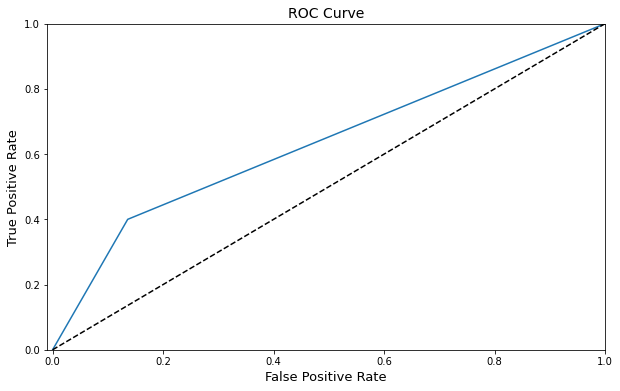

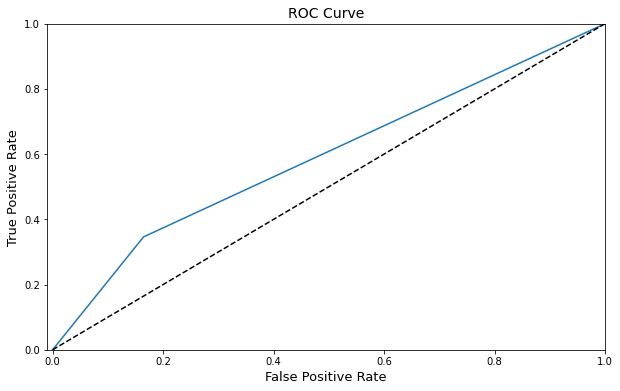

In [ ]:
knn_oversampled_fpr, knn_oversampled_tpr, knn_oversampled_thresold = roc_curve(y_test_oversampled2, knn_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(knn_oversampled_fpr, knn_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled2, knn_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)


knn_oversampled_fpr, knn_oversampled_tpr, knn_oversampled_thresold = roc_curve(y_validation_oversampled, knn_oversampled_pred_class_val)

plt.figure(figsize=(10,6))
plt.plot(knn_oversampled_fpr, knn_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_validation_oversampled, knn_oversampled_pred_class_val)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

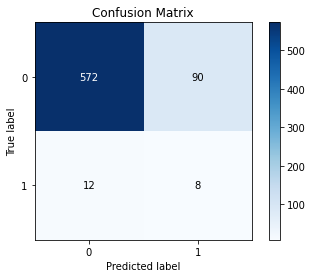

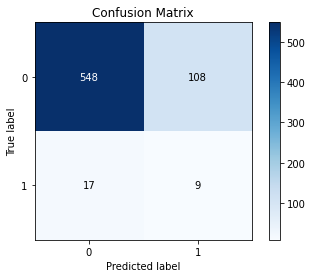

In [ ]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled2, knn_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_validation_oversampled, knn_oversampled_pred_class_val)

#Neural Network tuning with sherpa + SMOTE (relativamente inutil)

In [ ]:
parameters_mlp = [sherpa.Discrete('hidden_layer_sizes', [20, 200]),
                  sherpa.Choice('activation', ['identity', 'logistic', 'tanh', 'relu']),
                  sherpa.Choice('solver', ['lbfgs', 'sgd', 'adam']),
                  sherpa.Continuous('alpha', [0.00001, 0.25]),
                  sherpa.Choice('learning_rate', ['constant', 'invscaling', 'adaptive']),
                  sherpa.Continuous('learning_rate_init', [0.0001, 0.25]),
                  sherpa.Discrete('max_iter', [1, 400]),
                  sherpa.Choice('shuffle', [True, False]),
                  sherpa.Continuous('momentum', [0.9, 0.01])]

algorithm_mlp = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=20)

In [ ]:
study_mlp = sherpa.Study(parameters=parameters_mlp,
                     algorithm=algorithm_mlp,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8881 if on a cluster or
http://localhost:8881 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [ ]:
for trial in study_mlp:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    mlp = MLPClassifier(hidden_layer_sizes=(int(trial.parameters['hidden_layer_sizes'])),
                        activation=trial.parameters['activation'],
                        solver=trial.parameters['solver'],
                        alpha=trial.parameters['alpha'],
                        learning_rate=trial.parameters['learning_rate'],
                        learning_rate_init=trial.parameters['learning_rate_init'],
                        max_iter=trial.parameters['max_iter'],
                        shuffle=trial.parameters['shuffle'],
                        momentum=trial.parameters['momentum'])
    
    mlp.fit(x_train_oversampled2, y_train_oversampled2)
    mlp_pred_class = mlp.predict(x_test_oversampled2)

    mlp_f1 = f1_score(y_test_oversampled2, mlp_pred_class)

    print("F1 score: ", mlp_f1)
    study_mlp.add_observation(trial, iteration=1, objective=mlp_f1)
    study_mlp.finalize(trial)
print(study_mlp.get_best_result())

Trial  1  with parameters  {'hidden_layer_sizes': 141, 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.08263377031412028, 'learning_rate': 'constant', 'learning_rate_init': 0.08616510201158555, 'max_iter': 97, 'shuffle': True, 'momentum': 0.40672456276381613}
F1 score:  0.05873715124816446
Trial  2  with parameters  {'hidden_layer_sizes': 76, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08597472050054158, 'learning_rate': 'constant', 'learning_rate_init': 0.144803248844443, 'max_iter': 154, 'shuffle': True, 'momentum': 0.4419619957206022}
F1 score:  0.05961251862891207
Trial  3  with parameters  {'hidden_layer_sizes': 90, 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.19218973717113633, 'learning_rate': 'constant', 'learning_rate_init': 0.20424295420052183, 'max_iter': 98, 'shuffle': False, 'momentum': 0.5777838930544016}
F1 score:  0.04887983706720978
Trial  4  with parameters  {'hidden_layer_sizes': 128, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.01392465319940244

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.06565656565656566
Trial  11  with parameters  {'hidden_layer_sizes': 165, 'activation': 'identity', 'solver': 'sgd', 'alpha': 0.06977314120044635, 'learning_rate': 'adaptive', 'learning_rate_init': 0.19853890526919463, 'max_iter': 380, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  12  with parameters  {'hidden_layer_sizes': 88, 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.1963925709373008, 'learning_rate': 'adaptive', 'learning_rate_init': 0.2431853157065048, 'max_iter': 211, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0891089108910891
Trial  13  with parameters  {'hidden_layer_sizes': 127, 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.11763835829034525, 'learning_rate': 'adaptive', 'learning_rate_init': 0.11272608196956843, 'max_iter': 305, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.050505050505050504
Trial  14  with parameters  {'hidden_layer_sizes': 131, 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.2141958657204563, 'learning_rate': 'invscaling', 'learning_rate_init': 0.13536558142059238, 'max_iter': 301, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.06511627906976744
Trial  15  with parameters  {'hidden_layer_sizes': 158, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.07661215325862634, 'learning_rate': 'constant', 'learning_rate_init': 0.19787929739119325, 'max_iter': 374, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.07035175879396985
Trial  16  with parameters  {'hidden_layer_sizes': 160, 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.17299562009820513, 'learning_rate': 'invscaling', 'learning_rate_init': 0.12677945077632294, 'max_iter': 374, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.06862745098039216
Trial  17  with parameters  {'hidden_layer_sizes': 156, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.15264718819207715, 'learning_rate': 'adaptive', 'learning_rate_init': 0.2304268087489307, 'max_iter': 379, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.05856515373352856
Trial  18  with parameters  {'hidden_layer_sizes': 89, 'activation': 'identity', 'solver': 'sgd', 'alpha': 0.17831042548100046, 'learning_rate': 'adaptive', 'learning_rate_init': 0.24073904912683178, 'max_iter': 207, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  19  with parameters  {'hidden_layer_sizes': 130, 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.1547405594786528, 'learning_rate': 'constant', 'learning_rate_init': 0.16252766303118713, 'max_iter': 304, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.05730659025787966
Trial  20  with parameters  {'hidden_layer_sizes': 126, 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.2326270604790743, 'learning_rate': 'invscaling', 'learning_rate_init': 0.015041567535627897, 'max_iter': 303, 'shuffle': False, 'momentum': 0.9}
F1 score:  0.05737704918032787
{'Trial-ID': 6, 'Iteration': 1, 'activation': 'identity', 'alpha': 0.08543967907126233, 'hidden_layer_sizes': 160, 'learning_rate': 'adaptive', 'learning_rate_init': 0.1117363126771765, 'max_iter': 379, 'momentum': 0.11996997213418914, 'shuffle': False, 'solver': 'lbfgs', 'Objective': 0.12048192771084336}


In [ ]:
mlp_oversampled = MLPClassifier(hidden_layer_sizes=(160),
                        activation='identity',
                        solver='lbfgs',
                        alpha=0.08543967907126233,
                        learning_rate='adaptive',
                        learning_rate_init=0.1117363126771765,
                        max_iter=379,
                        shuffle=False,
                        momentum=0.11996997213418914)

mlp_oversampled.fit(x_train_oversampled2,y_train_oversampled2)
mlp_oversampled_pred_class = mlp_oversampled.predict(x_test_oversampled2)
mlp_oversampled_pred_class_val = mlp_oversampled.predict(x_validation_oversampled)

print(classification_report(y_test_oversampled2, mlp_oversampled_pred_class))
print(classification_report(y_validation_oversampled, mlp_oversampled_pred_class_val))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       662
           1       0.01      0.05      0.02        20

    accuracy                           0.85       682
   macro avg       0.49      0.46      0.47       682
weighted avg       0.94      0.85      0.90       682

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       656
           1       0.06      0.23      0.10        26

    accuracy                           0.84       682
   macro avg       0.51      0.55      0.50       682
weighted avg       0.93      0.84      0.88       682



Text(0, 0.5, 'True Positive Rate')

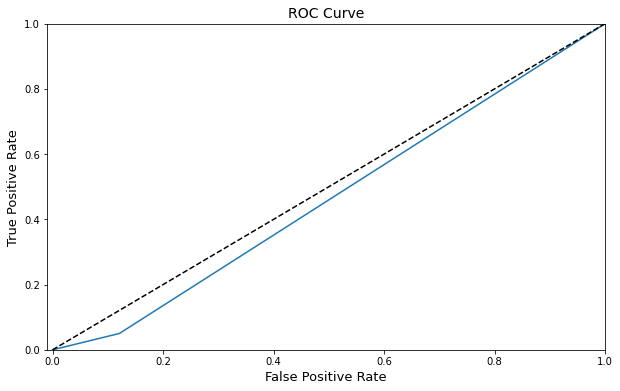

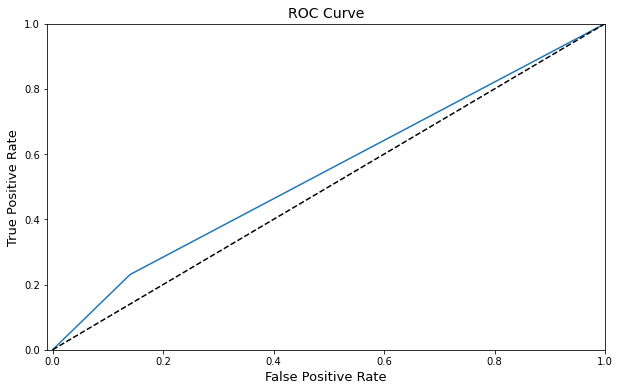

In [ ]:
mlp_oversampled_fpr, mlp_oversampled_tpr, mlp_oversampled_thresold = roc_curve(y_test_oversampled2, mlp_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(mlp_oversampled_fpr, mlp_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled2, mlp_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)


mlp_oversampled_fpr, mlp_oversampled_tpr, mlp_oversampled_thresold = roc_curve(y_validation_oversampled, mlp_oversampled_pred_class_val)

plt.figure(figsize=(10,6))
plt.plot(mlp_oversampled_fpr, mlp_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_validation_oversampled, mlp_oversampled_pred_class_val)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

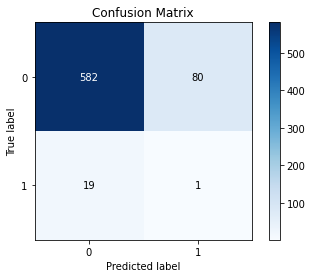

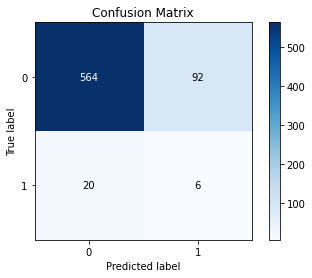

In [ ]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled2, mlp_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_validation_oversampled, mlp_oversampled_pred_class_val)

#Ensembles

In [23]:
estimators = [
  ('ld', LinearDiscriminantAnalysis()),
  ('rf', RandomForestClassifier(max_depth=30,
                                 max_features='sqrt',
                                 min_samples_leaf=3,
                                 min_samples_split=3,
                                 n_estimators=1430,
                                 class_weight='balanced',
                                 criterion='entropy')),
  ('xgb', XGBClassifier(learning_rate=0.0036763235737108197,
                                 max_depth=9,
                                 min_child_weight=3,
                                 subsample=0.5399799073901668,
                                 colsample_bytree=0.5778942973134813,
                                 n_estimators=338,
                                 objective= 'reg:squarederror'))
]

Stacking ensemble

In [24]:
clf = StackingClassifier(
  estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(x_train_oversampled, y_train_oversampled)
clf_oversampled_pred_class = clf.predict(x_test_oversampled)

print(classification_report(y_test_oversampled, clf_oversampled_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1318
           1       0.41      0.30      0.35        46

    accuracy                           0.96      1364
   macro avg       0.69      0.64      0.67      1364
weighted avg       0.96      0.96      0.96      1364



Text(0, 0.5, 'True Positive Rate')

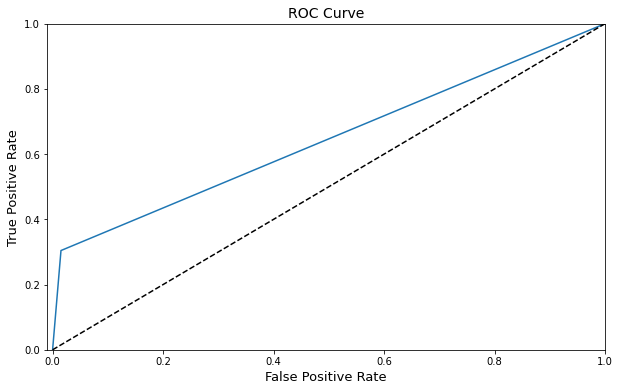

In [25]:
clf_oversampled_fpr, clf_oversampled_tpr, clf_oversampled_thresold = roc_curve(y_test_oversampled, clf_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(clf_oversampled_fpr, clf_oversampled_tpr, label='Stacking Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, clf_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

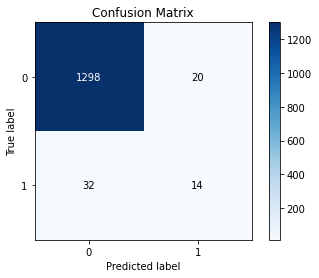

In [26]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, clf_oversampled_pred_class)

Hard Voting Ensemble

In [27]:
hardvc = VotingClassifier(estimators=estimators, voting='hard')

hardvc.fit(x_train_oversampled, y_train_oversampled)
hardvc_oversampled_pred_class = hardvc.predict(x_test_oversampled)

print(classification_report(y_test_oversampled, hardvc_oversampled_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1318
           1       0.37      0.65      0.47        46

    accuracy                           0.95      1364
   macro avg       0.68      0.81      0.72      1364
weighted avg       0.97      0.95      0.96      1364



Text(0, 0.5, 'True Positive Rate')

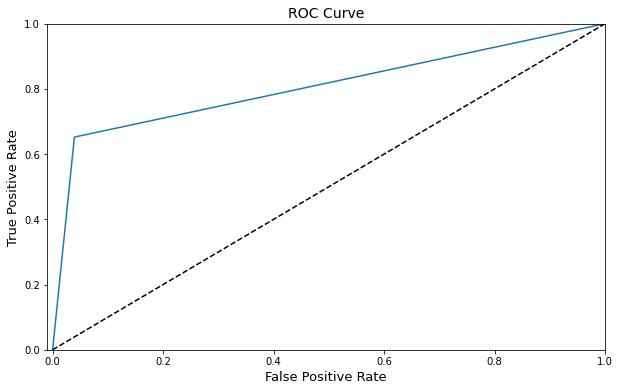

In [28]:
hardvc_oversampled_fpr, hardvc_oversampled_tpr, hardvc_oversampled_thresold = roc_curve(y_test_oversampled, hardvc_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(hardvc_oversampled_fpr, hardvc_oversampled_tpr, label='Stacking Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, hardvc_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

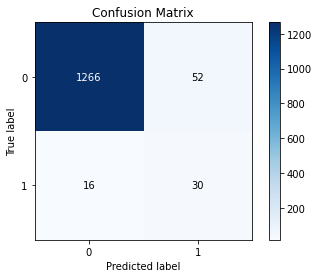

In [29]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, hardvc_oversampled_pred_class)

Soft Voting Ensemble

In [30]:
softvc = VotingClassifier(estimators=estimators, voting='soft')

softvc.fit(x_train_oversampled, y_train_oversampled)
softvc_oversampled_pred_class = softvc.predict(x_test_oversampled)

print(classification_report(y_test_oversampled, softvc_oversampled_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1318
           1       0.31      0.67      0.43        46

    accuracy                           0.94      1364
   macro avg       0.65      0.81      0.70      1364
weighted avg       0.97      0.94      0.95      1364



Text(0, 0.5, 'True Positive Rate')

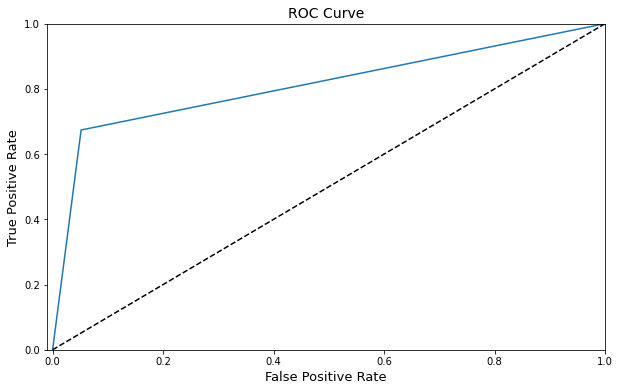

In [31]:
softvc_oversampled_fpr, softvc_oversampled_tpr, softvc_oversampled_thresold = roc_curve(y_test_oversampled, softvc_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(softvc_oversampled_fpr, softvc_oversampled_tpr, label='Stacking Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, softvc_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

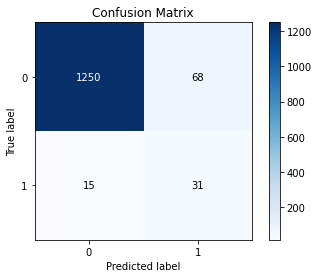

In [32]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, softvc_oversampled_pred_class)

#**A partir daqui somente caixinhas descontinuadas (mantidos por questão de reutilização de codigo e registro de tentativa)**

Balancing data: Undersampling with Tomek Links (descontinuado por não ser útil)

In [ ]:
#undersample = TomekLinks(sampling_strategy='majority')
#x_undersampled, y_undersampled = undersample.fit_resample(x, y)
#x_train_undersampled, x_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(x_undersampled, y_undersampled, test_size = 0.2, random_state = 0)

#print('Original dataset shape %s' % Counter(y))
#print('Resampled dataset shape %s' % Counter(y_undersampled))

Visualizações SelectKbest k = 10 (descontinuado por motivo de não gerar nenhum insight)

In [ ]:
# Rodar somente apos criar x e y em "Separação treino/teste"

#from sklearn.feature_selection import SelectKBest, chi2

#sel = SelectKBest(chi2, k=10)
#sel.fit(x, y)
#sel.get_support()

#x_kbest = x[x.columns[sel.get_support(indices=True)]]

In [ ]:
#x_kbest[' Bankrupt?'] = y

In [ ]:
#from IPython.display import Markdown

# `df` already in scope as the pandas dataframe with data

#hue = ' Bankrupt?'
#vars_per_line = 5
#all_vars = list(x_kbest.columns.symmetric_difference([hue]))

#for var in all_vars:
#    rest_vars = list(all_vars)
#    rest_vars.remove(var)
#    display(Markdown(f"## {var}"))
#    while rest_vars:
#        line_vars = rest_vars[:vars_per_line]
#        del rest_vars[:vars_per_line]
#        line_var_names = ", ".join(line_vars)
#        display(Markdown(f"### {var} vs {line_var_names}"))
#        sns.pairplot(x_kbest, x_vars=line_vars, y_vars=[var], hue=hue, palette='bright', )
#        plt.show()
#        plt.close()

Feature selection (descontinuado por motivos de não ser util/piorar significativamente alguns modelos)

In [ ]:
#sel = VarianceThreshold(threshold=0)
#sel.fit(bank_data)
#sel.get_support()


In [ ]:
# Assim percebemos que 'Net Income Flag' é inutil, afinal é uma constant features
# Dito isto, quase TODOS modelos melhoram um pouco (muito pouco), sendo a mlp_oversampled o unico afetado negativamente (de 41 true positives diminui para 31)


# bank_data = bank_data.drop(' Net Income Flag', axis=1)

In [ ]:
# Rodar essa caixinha tira aproximadamente 40 colunas (quase inuteis, por motivos de baixa variancia) do dataset.
# Dito isto, resulta em uma piora pequena de TODOS os modelos, sendo o mlp_oversampled o modelo mais afetado (de 41 true positives diminui para 36)

#sel = VarianceThreshold(threshold=0.001) # 99.9% of observations
#sel.fit(bank_data)
#sel.get_support()
#
#bank_data = bank_data[bank_data.columns[sel.get_support(indices=True)]]
#bank_data

In [ ]:
# Esta Feature selection sofre do mesmo problema do VarianceThreshold anterior, porém o mlp_oversampled é ainda mais afetado (de 41 true positives diminui para 27)
# Deve ser rodado apos criação do x e y em "Separação treino/teste"

#from sklearn.feature_selection import SelectKBest, chi2
#
#sel = SelectKBest(chi2, k=50)
#sel.fit(x, y)
#sel.get_support()
#
#x = x[x.columns[sel.get_support(indices=True)]]

#neural network with keras

In [ ]:
#from keras.models import Sequential
#from keras.layers import Dense
#from sklearn.metrics import roc_auc_score
#import tensorflow as tf

In [ ]:
#model = Sequential()
#model.add(Dense(512, input_dim=95, kernel_initializer= 'uniform' , activation= 'relu' ))
#model.add(Dense(256, kernel_initializer= 'uniform' , activation= 'relu' ))
#model.add(Dense(128, kernel_initializer= 'uniform' , activation= 'relu' ))
#model.add(Dense(128, kernel_initializer= 'uniform' , activation= 'relu' ))
#model.add(Dense(256, kernel_initializer= 'uniform' , activation= 'relu' ))
#model.add(Dense(128, kernel_initializer= 'uniform' , activation= 'relu' ))
#model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))
## Compile model
#model.compile(loss= 'binary_crossentropy', optimizer= 'adam' , metrics=['accuracy'])

In [ ]:
#history = model.fit(x_train_oversampled, y_train_oversampled, validation_split=0.33, epochs=1000)



In [ ]:
#history.history

In [ ]:
#plt.plot(history.history[ 'accuracy' ])
#plt.plot(history.history[ 'val_accuracy' ])
#plt.title( 'model auc' )
#plt.ylabel( 'auc' )
#plt.xlabel( 'epoch' )
#plt.legend([ 'train' , 'test' ], loc= 'lower right' )
#plt.show()

In [ ]:
#plt.plot(history.history[ 'loss' ])
#plt.plot(history.history[ 'val_loss' ])
#plt.title( 'model loss' )
#plt.ylabel( 'loss' )
#plt.xlabel( 'epoch' )
#plt.legend([ 'train' , 'test' ], loc= 'upper left' )
#plt.show()